# Lending Club Analysis

### <font color='Maroon'>Analysis Working sheet by Shakeeb Pasha and Vishal Khera</font>

In [499]:
# Importing the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup environmental parameters
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 150)

# Data Understanding

In [500]:
# Loading the file provided
loan_data = pd.read_csv('loan/loan.csv', low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [501]:
# Get original Rows and Columns in the dataset
loan_data.shape

(39717, 111)

In [502]:
# Get datatypes the dataframe is made up off
loan_data.dtypes

id                                int64  
member_id                         int64  
loan_amnt                         int64  
funded_amnt                       int64  
funded_amnt_inv                   float64
term                              object 
int_rate                          object 
installment                       float64
grade                             object 
sub_grade                         object 
emp_title                         object 
emp_length                        object 
home_ownership                    object 
annual_inc                        float64
verification_status               object 
issue_d                           object 
loan_status                       object 
pymnt_plan                        object 
url                               object 
desc                              object 
purpose                           object 
title                             object 
zip_code                          object 
addr_state                        

# Data Cleanup

In [503]:
# Remove columns we are not going to use e.g. URL, description
loan_data = loan_data.drop(['url', 'desc'], axis = 1)

# convert percentages to number
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : float(x.split('%')[0]))
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67

In [504]:
# Reusable Function to provide missing values % in decending order
def print_missing_value_percentage(df):
    print('No of columns:', len(df.columns))
    print(round(100 * (df.isna().sum().sort_values(ascending=False)/len(df.index)), 2))

In [505]:
print_missing_value_percentage(loan_data)

No of columns: 109
total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
verification_status_joint         100.

In [506]:
# drop columns where more than 50% missing na values
missing_value_columns = loan_data.columns[(loan_data.isna().sum()/len(loan_data.index)) >= 0.5]
print('No of columns with more than 50% missing values:', len(missing_value_columns))
loan_data = loan_data.drop(missing_value_columns, axis=1, inplace=False)
print('No of columns after dropping columns with more than 50% missing values:', len(loan_data.columns))

No of columns with more than 50% missing values: 57
No of columns after dropping columns with more than 50% missing values: 52


In [507]:
print_missing_value_percentage(loan_data)

No of columns: 52
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
zip_code                      0.00
sub_grade                     0.00
home_ownership                0.00
dti                           0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
ad

In [508]:
# Consider the columns with less than 10% and greater than 1% missing values
# emp_title, emp_length and pub_rec_bankruptcies
# Let's find the values that can be used to impute these columns

# emp_title - 6.19% missing values
loan_data['emp_title'].describe()

count     37258  
unique    28820  
top       US Army
freq      134    
Name: emp_title, dtype: object

#### <font color='Maroon'>Insights - Given this is a categorical variable and that number of unique values is too high, we could potentially use 'mode' to impute, which is 'US Army'</font>

In [509]:
# emp_length - 2.71% missing values
print(loan_data['emp_length'].describe())
print(loan_data['emp_length'].value_counts())

count     38642    
unique    11       
top       10+ years
freq      8879     
Name: emp_length, dtype: object
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


#### <font color='Maroon'>Insights - Given this is a categorical variable and the count of 1 category is higher than the others categories, we could potentially use 'mode' to impute, which is '10+ years'</font>

In [510]:
# pub_rec_bankruptcies - 1.75% missing values
print(loan_data['pub_rec_bankruptcies'].describe())
print(loan_data['pub_rec_bankruptcies'].value_counts())

count    39020.000000
mean     0.043260    
std      0.204324    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      2.000000    
Name: pub_rec_bankruptcies, dtype: float64
0.0    37339
1.0    1674 
2.0    7    
Name: pub_rec_bankruptcies, dtype: int64


#### <font color='Maroon'>Insights - Given this is a categorical variable and the  count of 1 category is higher than the others categories, we could potentially use 'mode' to impute, which is '0.0'</font>

In [511]:
# Lets check on the columns that have data - the quality of the data
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


#### <font color='Maroon'>Insights - From the results above it makes sense to droptax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, collections_12_mths_ex_med as they all have 0 values for all statistical parameters, which means they all have a 0 value across </font>

In [512]:
loan_data = loan_data.drop(['tax_liens','delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq', 'collections_12_mths_ex_med'], axis = 1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.0


In [513]:
# Drop columns with single unique values - They dont have any value
loan_data = loan_data[[c for c in loan_data.columns if loan_data[c].nunique() > 1]]
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [514]:
# drop any duplicate rows
loan_data = loan_data.drop_duplicates(subset=None, keep='first')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [515]:
# drop rows with all values nan
print('Before dropping nan rows: ', loan_data.shape)
loan_data = loan_data[~loan_data.isna().all(1)]
print('After dropping nan rows: ', loan_data.shape)

Before dropping nan rows:  (39717, 43)
After dropping nan rows:  (39717, 43)


In [516]:
# Remove all loan which have loan status as 'current'
# as we will not know till end of last installment if they are 'closed' or 'charged off'
loan_data = loan_data[loan_data['loan_status']!='Current']
loan_data.shape

(38577, 43)

## Categorizing variables
![categories](https://i.ibb.co/7r5TKPg/pic2.png)

In [517]:
# we will drop all the customer Behavior metrics as these are the events happening after the loan is disbursed
loan_data = loan_data.drop(columns=[
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'revol_bal',
    'revol_util'
])
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

# Univariate Analysis

#### Reusable Functions

In [518]:
# Function to Plot a distribution given a dataframe and column
def head_and_line_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    df[col].value_counts().plot()
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    plt.show()

def head_and_bar_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel) 
    plt.xticks(rotation=90)
    plt.show()

def head_and_pie_plot(df, col, ptitle='Breakup'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(ptitle)
    plt.show()
    
    
    
def head_and_bar_plot_no_order(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[col].value_counts().head())
    sns.countplot(x=col, data=df)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel) 
    plt.xticks(rotation=90)
    plt.show()

In [519]:
# List of Columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [520]:
loan_data.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,9,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,4,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,10,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,37,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,12,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,11,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,4,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,13,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,3,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,23,0.0


#### Variables
![variables](https://i.ibb.co/JH2QFfW/pic1.png)

In [521]:
# drop columns not relevant for analysis
loan_data = loan_data.drop(columns=[
    'earliest_cr_line',
    'id',
    'member_id',
    'zip_code'
])
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,1,3,0,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,5,3,0,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,2,2,0,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,1,10,0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,3,9,0,12,0.0


## Categorical Variables
### Unordered categorical

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
Name: addr_state, dtype: int64


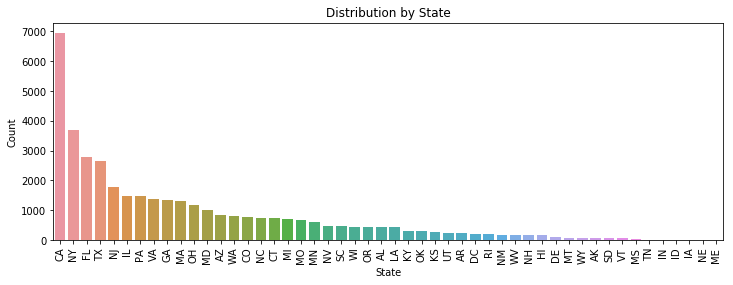

In [522]:
head_and_bar_plot(loan_data, 'addr_state', 'Distribution by State', 'State','Count')

#### <font color='Maroon'>Insights - Majority of the business is in 10 states</font>

Not Verified       16694
Verified           12206
Source Verified    9677 
Name: verification_status, dtype: int64


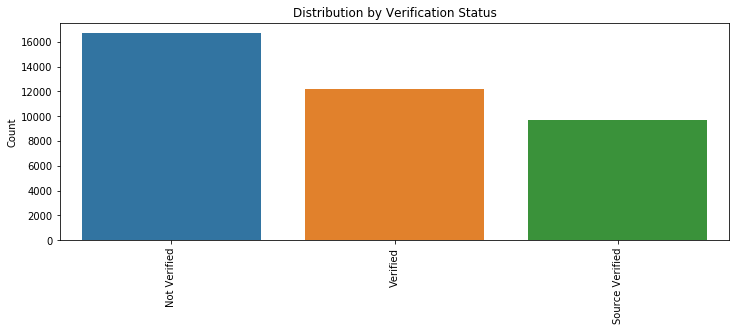

In [ ]:
head_and_bar_plot(loan_data, 'verification_status', 'Distribution by Verification Status', '' ,'Count')

#### <font color='Maroon'>Insights - A significant portion of the loans shows are not verified</font>

debt_consolidation    18055
credit_card           5027 
other                 3865 
home_improvement      2875 
major_purchase        2150 
Name: purpose, dtype: int64


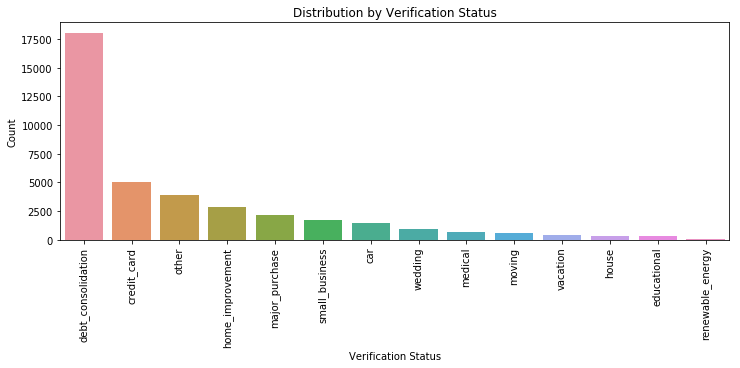

In [ ]:
head_and_bar_plot(loan_data, 'purpose','Distribution by Verification Status', 'Verification Status' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are for Debt Consolidation</font>

RENT        18480
MORTGAGE    17021
OWN         2975 
OTHER       98   
NONE        3    
Name: home_ownership, dtype: int64


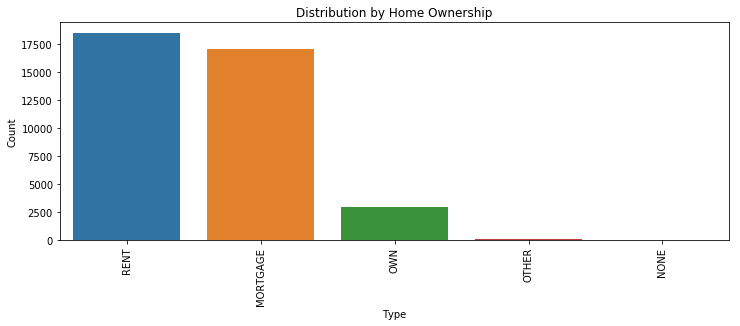

In [ ]:
head_and_bar_plot(loan_data, 'home_ownership', 'Distribution by Home Ownership', 'Type' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are by people with rented / mortgaged homes</font>

16    1424
15    1418
17    1411
14    1403
20    1390
Name: total_acc, dtype: int64


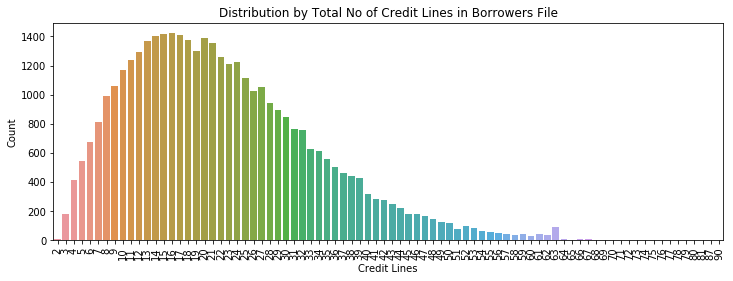

In [ ]:
head_and_bar_plot_no_order(loan_data, 'total_acc', 'Distribution by Total No of Credit Lines in Borrowers File', 'Credit Lines', 'Count')

#### <font color='Maroon'>Insights - The number of credit lines on the Borrower's file follows a standard distribution</font>

#### <font color='Blue'>Note - We have skipped plots with 'title' and 'emp_title' as the variablity of information is too high and a plot will not yield any insights</font>

### Ordered categorical variables

 36 months    29096
 60 months    9481 
Name: term, dtype: int64


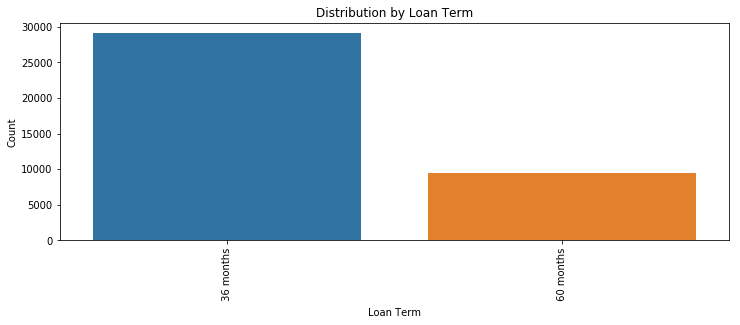

In [ ]:
head_and_bar_plot(loan_data, 'term', 'Distribution by Loan Term', 'Loan Term' ,'Count')

#### <font color='Maroon'>Insights - Almost 75% of the loans are of tenure 36 months</font>

In [ ]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [ ]:
# Replace the nan values in the table to NotAvailable
loan_data.loc[loan_data['emp_length'].isnull(), 'emp_length'] = 'NotAvailable'
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       'NotAvailable'], dtype=object)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
Name: emp_length, dtype: int64


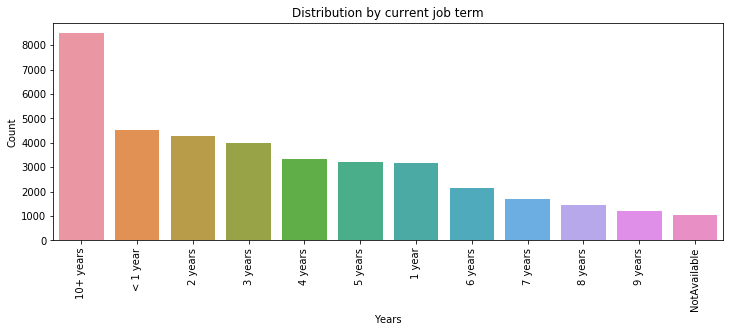

In [ ]:
head_and_bar_plot(loan_data, 'emp_length', 'Distribution by current job term', 'Years' ,'Count')

#### <font color='Maroon'>Insights - Majority of Loans are given to people with  jobs. There are close to 1000 people who have not disclosed or are not in jobs</font>

B    11675
A    10045
C    7834 
D    5085 
E    2663 
Name: grade, dtype: int64


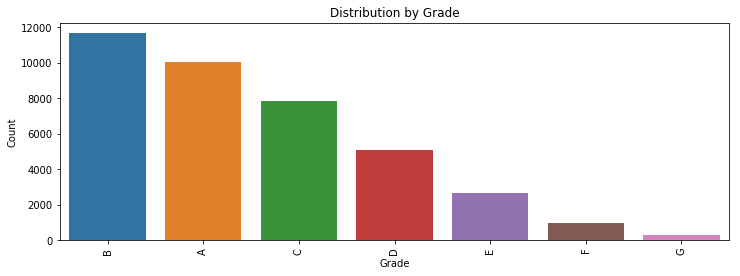

In [ ]:
head_and_bar_plot(loan_data, 'grade', 'Distribution by Grade', 'Grade' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans are with A,B and C gradings</font>

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
Name: sub_grade, dtype: int64


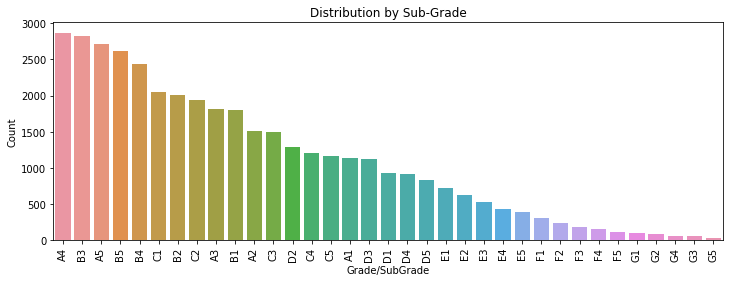

In [ ]:
head_and_bar_plot(loan_data, 'sub_grade', 'Distribution by Sub-Grade', 'Grade/SubGrade' ,'Count')

#### <font color='Maroon'>Insights - Further breakdown by sub grade shows D, E and F grades are not encouraged with the outlier of D2 which seems to be high in comparison</font>

In [ ]:
loan_data['emp_title'].value_counts().head()

US Army              131
Bank of America      107
IBM                  65 
AT&T                 57 
Kaiser Permanente    56 
Name: emp_title, dtype: int64

#### <font color='Maroon'>Insights - Employee Title Contains too much text, no processing done on this column</font>

Fully Paid     32950
Charged Off    5627 
Name: loan_status, dtype: int64


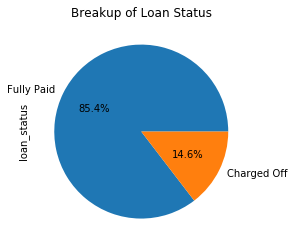

In [ ]:
head_and_pie_plot(loan_data, 'loan_status', "Breakup of Loan Status")

#### <font color='Maroon'>Insights - 85.4% of loans closed have been fully paid up, 14.6% of loans have gone bad</font>


0    36507
1    2013 
2    48   
3    7    
4    2    
Name: pub_rec, dtype: int64


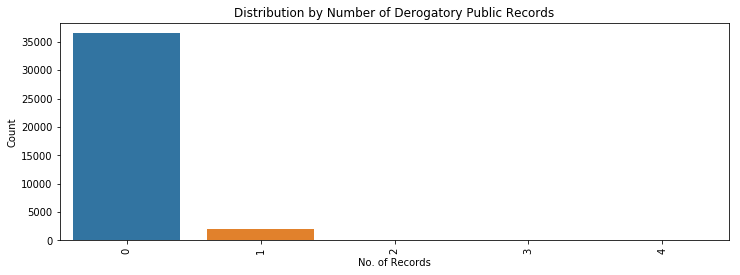

In [ ]:
head_and_bar_plot(loan_data, 'pub_rec', 'Distribution by Number of Derogatory Public Records', 'No. of Records')

#### <font color='Maroon'>Insights - We have about 2100 cases with derogatory public records which is a little over 5% of the population.</font>

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Name: issue_d, dtype: int64


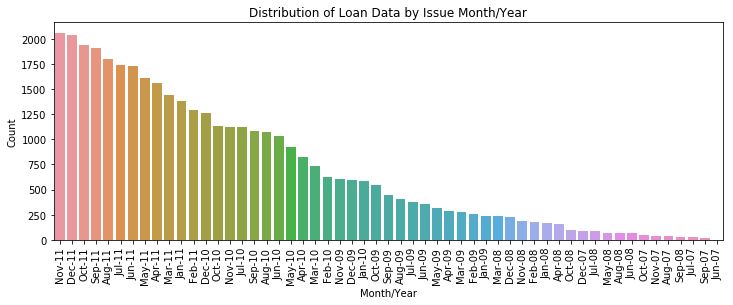

In [ ]:
head_and_bar_plot(loan_data, 'issue_d', 'Distribution of Loan Data by Issue Month/Year', 'Month/Year')

#### <font color='Maroon'>Insights - No real abnormal patterns seen in the distribution of loans by month</font>

0    18709
1    10660
2    5654 
3    2983 
4    316  
Name: inq_last_6mths, dtype: int64


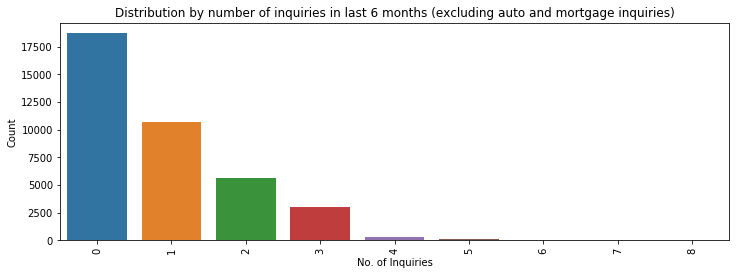

In [ ]:
head_and_bar_plot(loan_data, 'inq_last_6mths', 'Distribution by number of inquiries in last 6 months (excluding auto and mortgage inquiries)','No. of Inquiries')
# looks like not many loan applications with more than 4 inquiries were approved

#### <font color='Maroon'>Insights - Not many loan applications with more than 3 inquiries were approved</font>

0.0    36238
1.0    1637 
2.0    5    
Name: pub_rec_bankruptcies, dtype: int64


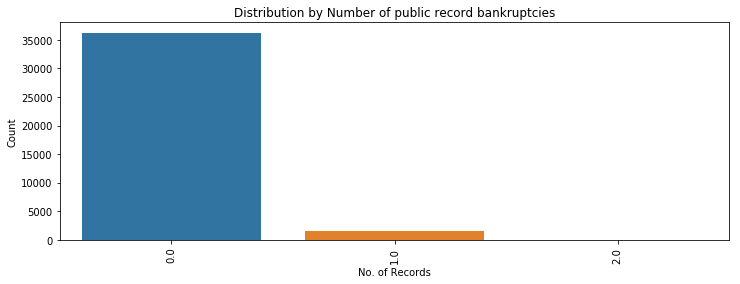

In [ ]:
head_and_bar_plot(loan_data, 'pub_rec_bankruptcies','Distribution by Number of public record bankruptcies', 'No. of Records')

#### <font color='Maroon'>Insights - About 94% of the loans were given to applicants with 0 public record bankruptcies and about 4% with with 1 record</font>

0    34386
1    3207 
2    673  
3    212  
4    60   
Name: delinq_2yrs, dtype: int64


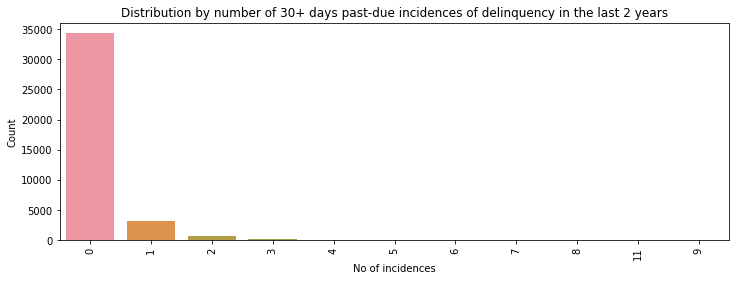

In [ ]:
head_and_bar_plot(loan_data, 'delinq_2yrs', 'Distribution by number of 30+ days past-due incidences of delinquency in the last 2 years', 'No of incidences')
# number 1 corresponds to default rate

#### <font color='Maroon'>Insights - About 2.5% of the applicants given loan have had over 1 incident of deliquency in the last 2 years</font>

7    3909
6    3846
8    3814
9    3607
5    3111
Name: open_acc, dtype: int64


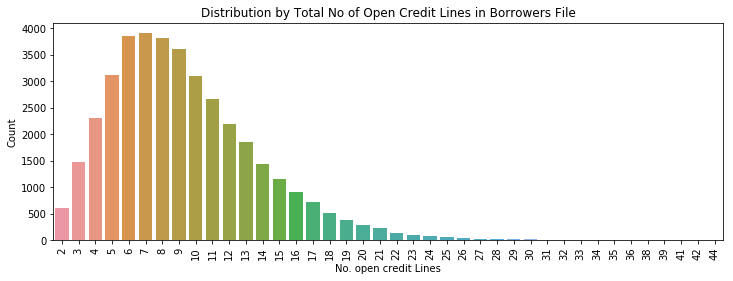

In [ ]:
head_and_bar_plot_no_order(loan_data, 'open_acc', 'Distribution by Total No of Open Credit Lines in Borrowers File', 'No. open credit Lines', 'Count')

#### <font color='Maroon'>Insights - The number of credit lines on the Borrower's file follows a standard distribution</font>

### Continuous variables

In [ ]:
loan_data[['int_rate', 'loan_amnt', 'installment', 'dti', 'funded_amnt', 'annual_inc']].describe()

,int_rate,loan_amnt,installment,dti,funded_amnt,annual_inc
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04
mean,11.932219,11047.025430,322.466318,13.272727,10784.058506,6.877797e+04
std,3.691327,7348.441646,208.639215,6.673044,7090.306027,6.421868e+04
min,5.420000,500.000000,15.690000,0.000000,500.000000,4.000000e+03
25%,8.940000,5300.000000,165.740000,8.130000,5200.000000,4.000000e+04
50%,11.710000,9600.000000,277.860000,13.370000,9550.000000,5.886800e+04
75%,14.380000,15000.000000,425.550000,18.560000,15000.000000,8.200000e+04
max,24.400000,35000.000000,1305.190000,29.990000,35000.000000,6.000000e+06


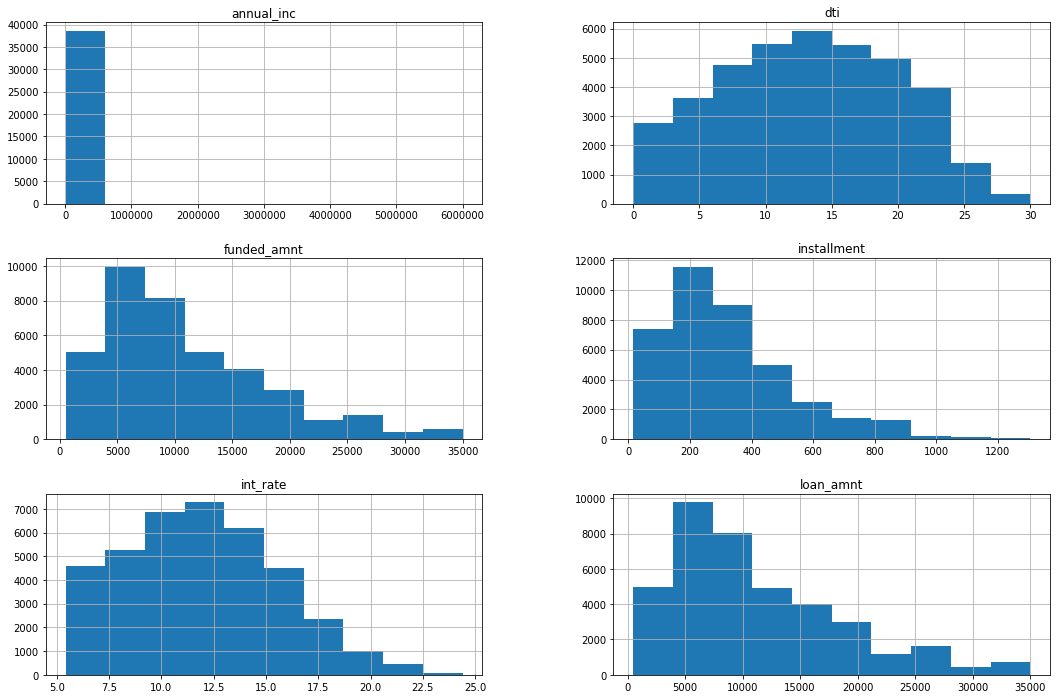

In [ ]:
loan_data[['int_rate', 'loan_amnt', 'installment', 'dti', 'funded_amnt', 'annual_inc']].hist(figsize=(18,12))
plt.show()

#### <font color='Maroon'>Insights - No abnormal patterens seen. All move towards a skewed normal curve</font>

int_rate : outlier cutoff=22


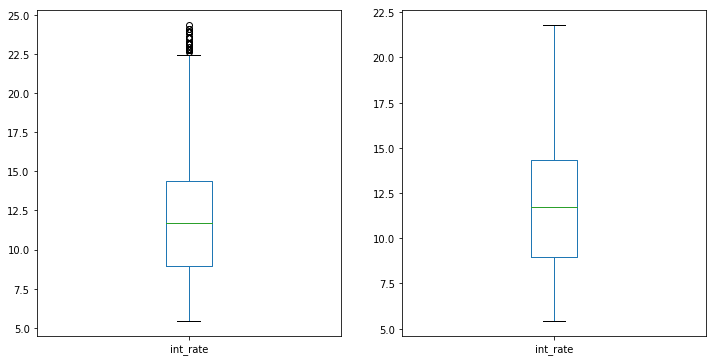

loan_amnt : outlier cutoff=28000


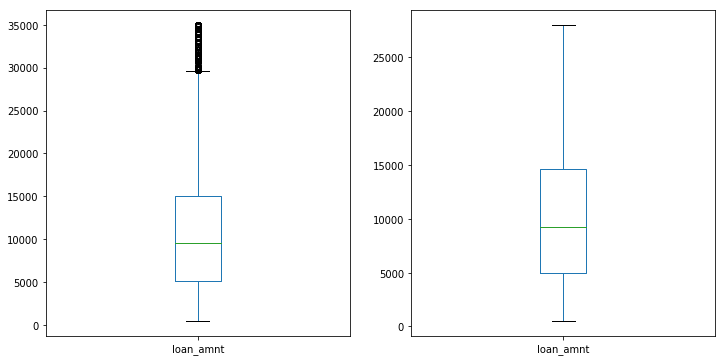

installment : outlier cutoff=750


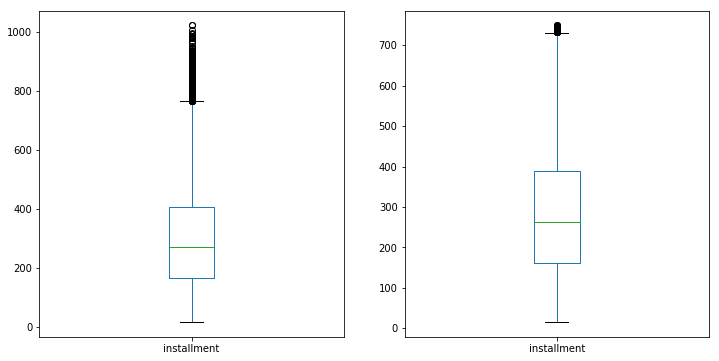

dti : outlier cutoff=30


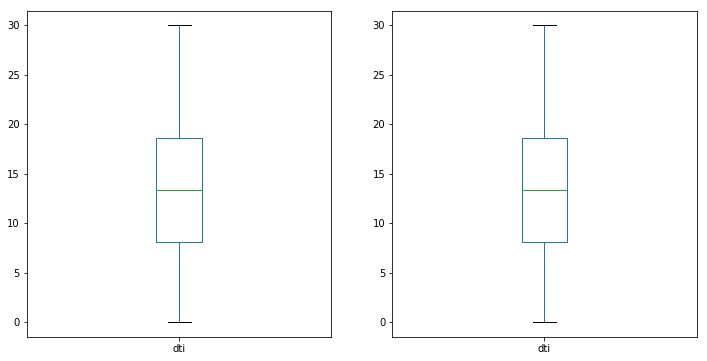

funded_amnt : outlier cutoff=30000


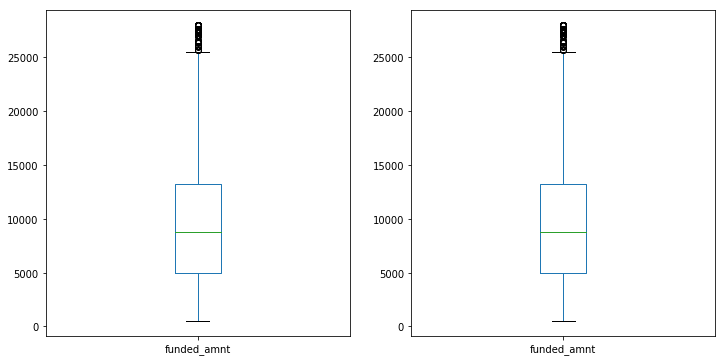

annual_inc : outlier cutoff=82300.0


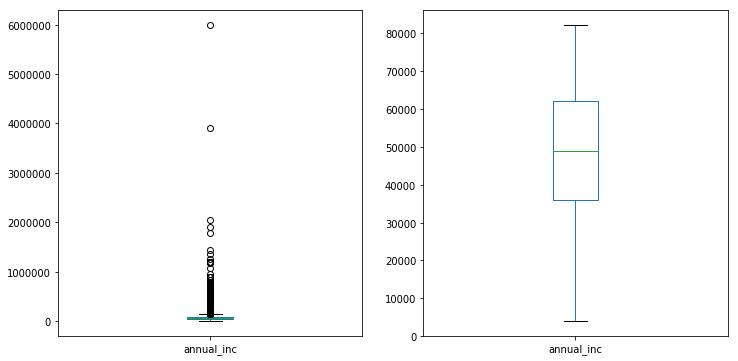

In [ ]:
outlier_maps = {'int_rate': 22, # dont want to apply outlier treatment
                'loan_amnt': 28000,
                'installment': 750, 
                'dti': 30, 
                'funded_amnt': 30000,
                'annual_inc': 8.230000e+04}

for col, val in outlier_maps.items():
    plt.figure(figsize=(12, 6))
    print(f'{col} : outlier cutoff={val}')
    loan_data[[col]].plot.box(ax=plt.subplot(121))
    loan_data = loan_data[loan_data[col] <= val]
    loan_data[[col]].plot.box(ax=plt.subplot(122))
    plt.show()

In [ ]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

# Segemented Univariate Analysis


In [ ]:
# Reusable Functions
def group_and_default_rate(col, 
                           ptitle='Distribution of Bad Loans', 
                           p_inv_title='Distribution of Closed Loans', 
                           pxlabel='', 
                           pylabel='Percent', 
                           df=loan_data,
                           rot_x_label = True,
                           hspace=0.2):
    fig, axis = plt.subplots(2, 1, figsize=(18, 12))
    fig.tight_layout()
    plt.subplots_adjust(hspace=hspace)
    
    plt.subplot(2, 1, 1)
    # Set labels
    pylabel='Percent'
    py2label = 'Count of Bad Loans'

    # Process Information
    p_table = df.groupby([col, 'loan_status']).count()[['loan_amnt']]
    p_table = p_table.rename(columns={"loan_amnt":"count"})
    p_table = p_table.reset_index()
    totals_table = p_table.groupby(col).sum()
    p_table['totals'] = p_table[col].apply(lambda x : totals_table.loc[x]['count'])
    p_table['rate'] = round(100*(p_table['count']/p_table['totals']))

    # Plot Column chart of col Left hand chart 
    p_table_top50 = p_table[p_table['loan_status'] == 'Charged Off'][[col,'totals', 'count',  'rate']] \
            .sort_values('rate', ascending=False) \
            .head(50) \
            .reset_index(drop=True)
    
    sns.barplot(x=col, y='rate', data=p_table_top50, label='% Bad Loans', order=p_table_top50[col])
    
    if rot_x_label:
        plt.xticks(rotation=90)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    # Plot Charged off loans guideline i.e. 14% 
    plt.axhline(y=14.6, linewidth=1.00, color='r', ls='--')

    # Hack to add 2nd Chart legend to primary and we supress the 2nd
    plt.plot(np.nan, color='tab:green', label = 'Count of Bad Loans')
    plt.plot(np.nan, color='tab:red',ls='--', label = 'Average % of Bad Loans')
    plt.legend()

    # Create 2nd line chart of count count of corresponding bad loans - Right hand chart 
    plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
    plt2.tick_params(axis='y', labelcolor='tab:green')
    sns.pointplot(x=col, y='count', data=p_table_top50, color='tab:green', marker='o', ax=plt2, label='Count', order=p_table_top50[col])
    plt2.set_ylabel(py2label, color='tab:green')  # we already handled the x-label with ax1

    
    plt.subplot(2, 1, 2)
    # Set labels
    pylabel='Percent'
    py2label = 'Count of Good Loans'

    # Process Information
    p_table = df.groupby([col, 'loan_status']).count()[['loan_amnt']]
    p_table = p_table.rename(columns={"loan_amnt":"count"})
    p_table = p_table.reset_index()
    totals_table = p_table.groupby(col).sum()
    p_table['totals'] = p_table[col].apply(lambda x : totals_table.loc[x]['count'])
    p_table['rate'] = round(100*(p_table['count']/p_table['totals']))

    # Plot Column chart of col Left hand chart 
    p_table_top50 = p_table[p_table['loan_status'] == 'Fully Paid'][[col,'totals', 'count',  'rate']] \
            .sort_values('rate', ascending=False) \
            .head(50) \
            .reset_index(drop=True)
    
    sns.barplot(x=col, y='rate', data=p_table_top50, label='% Closed Loans', order=p_table_top50[col])
    if rot_x_label:
        plt.xticks(rotation=90)
    plt.title(p_inv_title)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    # Plot Good loans guideline i.e. 85.4% 
    plt.axhline(y=85.4, linewidth=1.00, color='r', ls='--')

    # Hack to add 2nd Chart legend to primary and we supress the 2nd
    plt.plot(np.nan, color='tab:green', label = 'Count of Good Loans')
    plt.plot(np.nan, color='tab:red',ls='--', label = 'Average % of Good Loans')
    plt.legend()

    # Create 2nd line chart of count count of corresponding bad loans - Right hand chart 
    plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
    plt2.tick_params(axis='y', labelcolor='tab:green')
    sns.pointplot(x=col, y='count', data=p_table_top50, color='tab:green', marker='o', ax=plt2, label='Count', order=p_table_top50[col])
    plt2.set_ylabel(py2label, color='tab:green')  # we already handled the x-label with ax1

    plt.show()



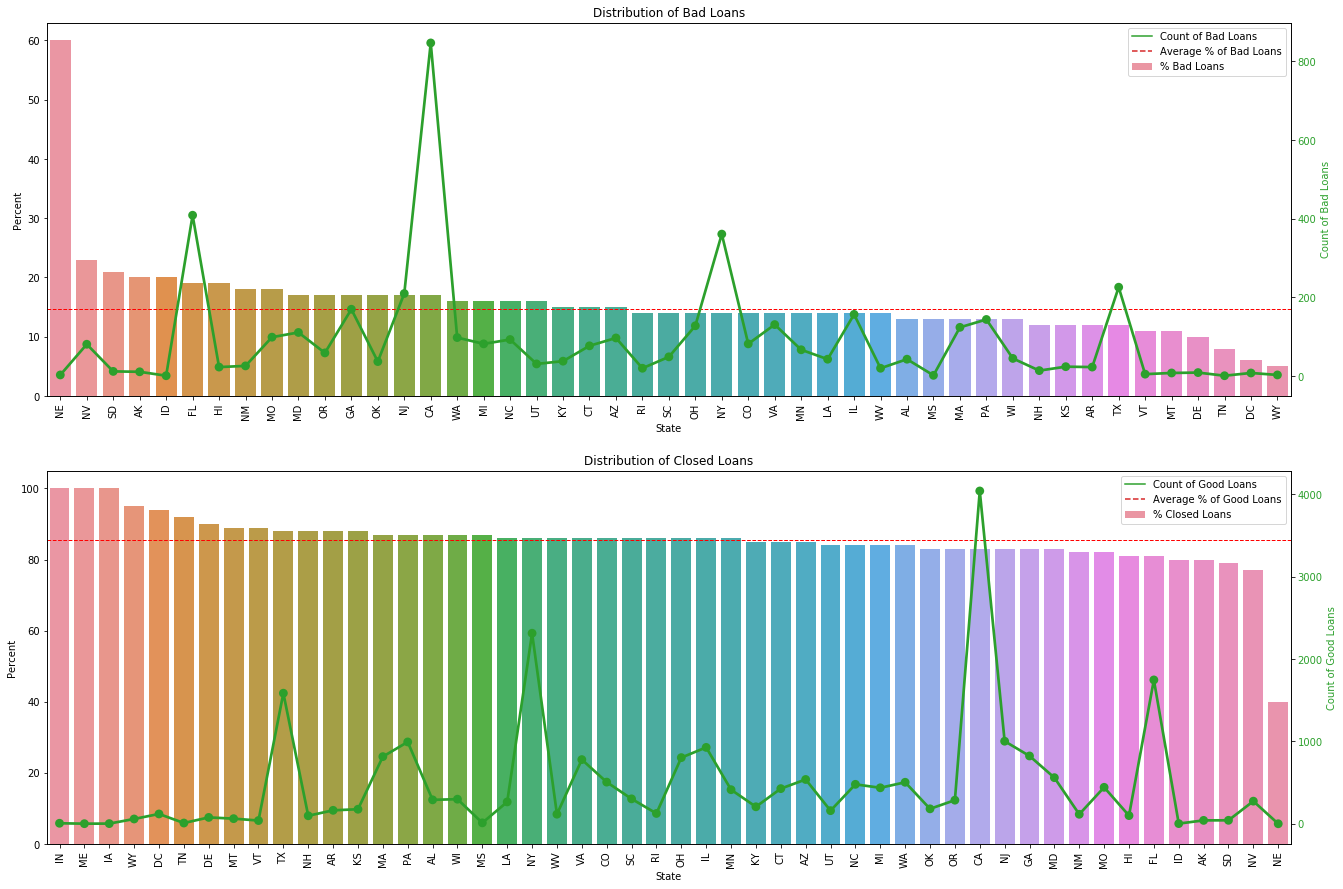

In [ ]:
# is there any relation w.r.t addr_state and default rate
group_and_default_rate('addr_state', pxlabel='State')

# Nebraska and Nevada have unusually high rate of defaults

#### <font color='Maroon'>Insights - It is clear in terms of high volume and higher than average bad loans are coming from FL, NJ, CA.</font>
#### <font color='Maroon'>Clearly NE, NV, AK, SD, are also high in their default rate even though the numbers are less</font>
#### <font color='Maroon'>Clearly NY, TX are good for Lending Club where the volumes are there and the default rates are low </font>


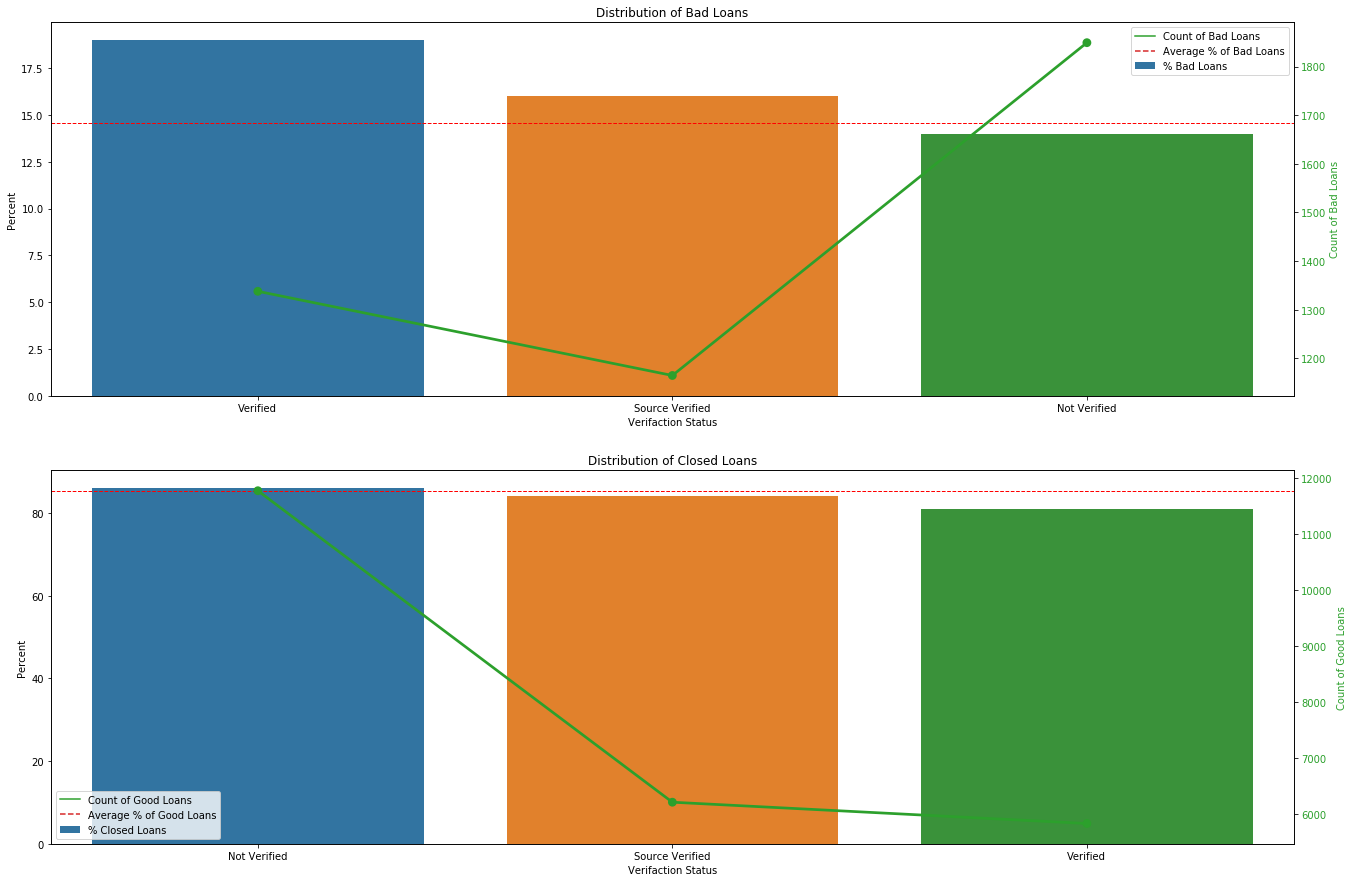

In [ ]:
# is there any relation w.r.t verification_status and default rate
group_and_default_rate('verification_status', pxlabel="Verifaction Status", rot_x_label=False)

#### <font color='Maroon'>Insights - Not much difference, however verified applicants seem to have a have higher default rate! than not verified ones.</font>

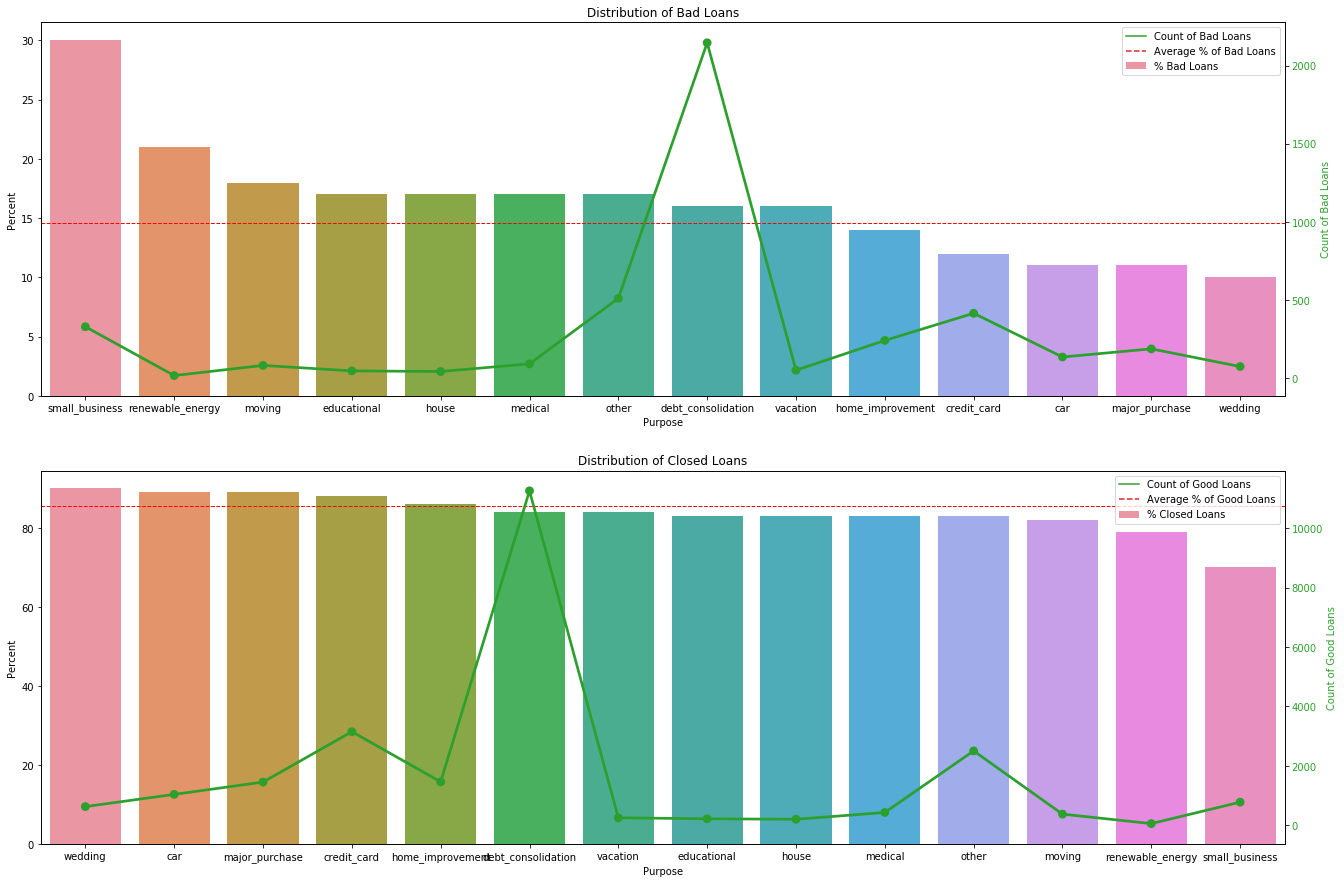

In [ ]:
# is there any relation w.r.t purpose of loan and default rate
group_and_default_rate('purpose', pxlabel='Purpose', rot_x_label=False)

#### <font color='Maroon'>Insights - Small business loans have the higher % of loans going bad and debt consolidation is the highest in terms of volumes but higest in terms of number of bad loans</font>

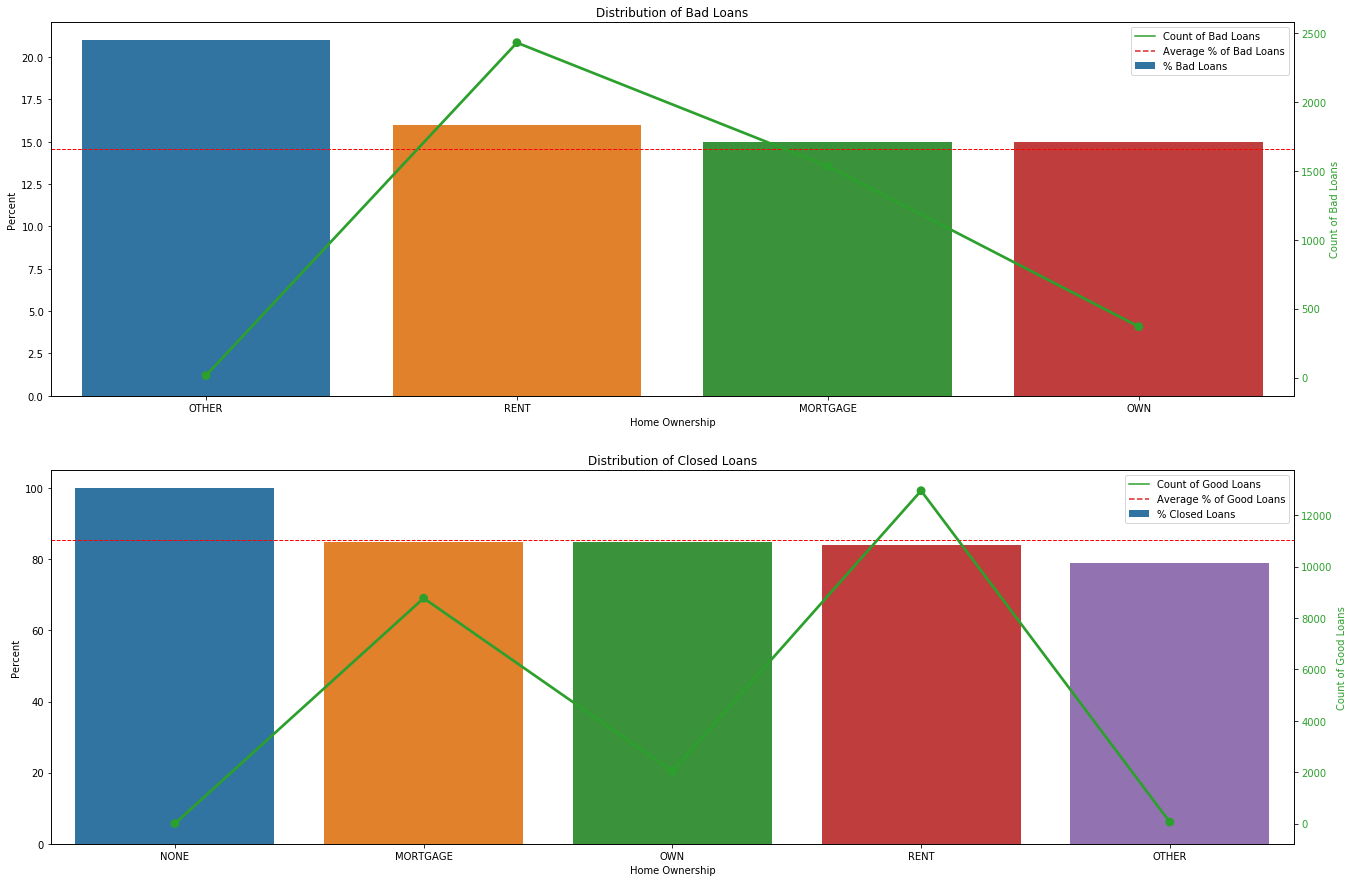

In [ ]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('home_ownership', pxlabel='Home Ownership', rot_x_label=False)

#### <font color='Maroon'>Insights - People who have mortgaged houses seem to have lesser rate of default</font>

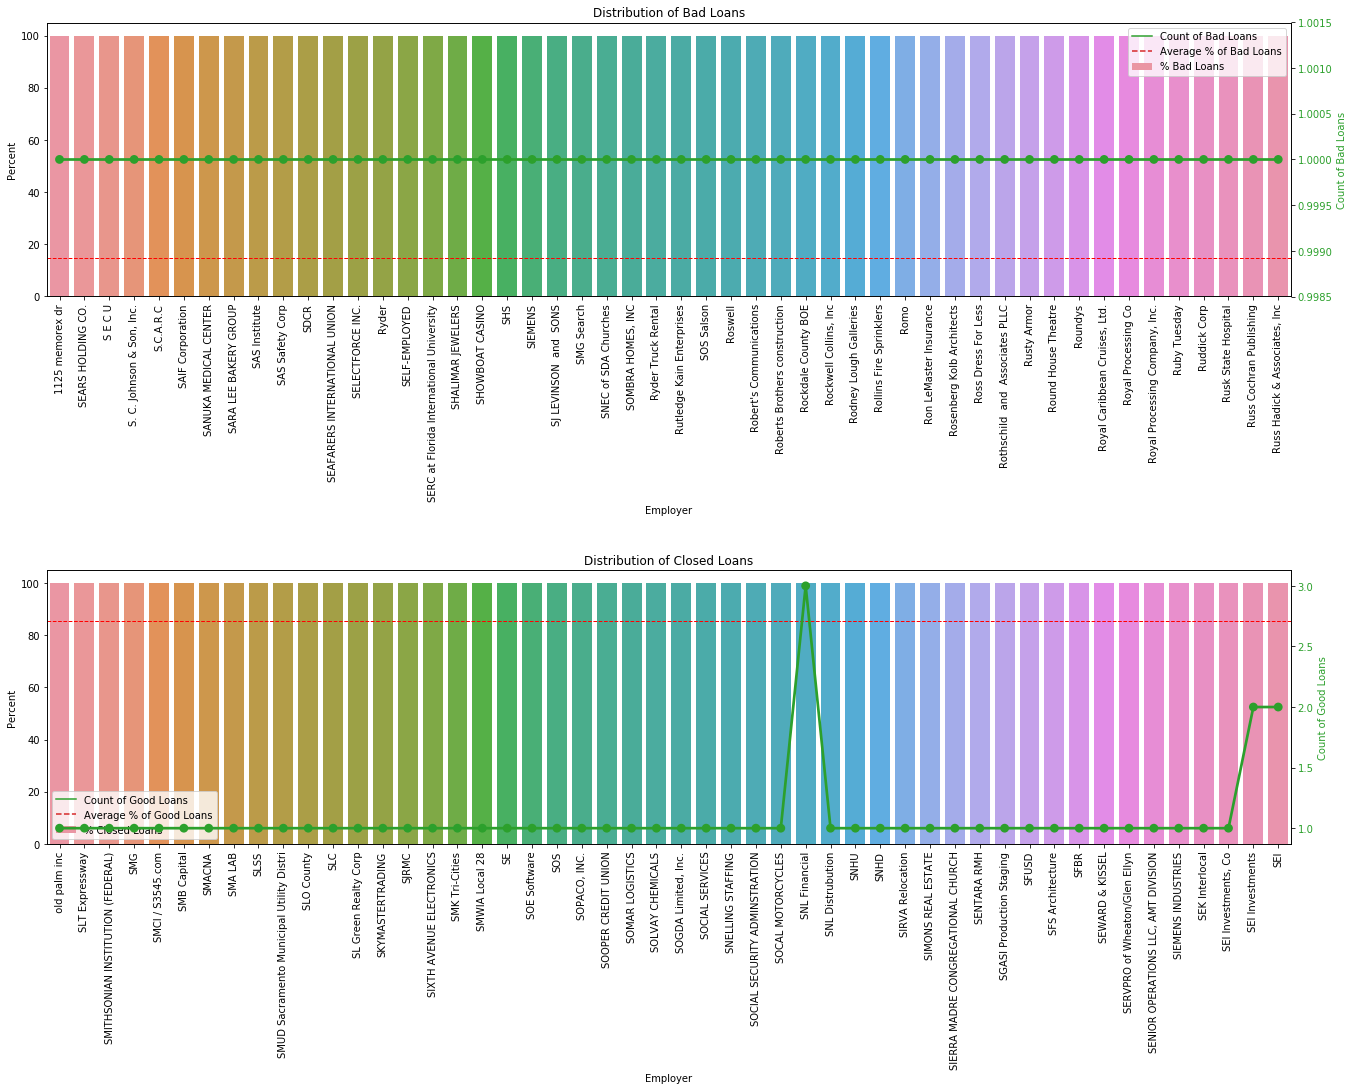

In [ ]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('emp_title', pxlabel='Employer', hspace=1)

#### <font color='Maroon'>Insights - On backgrounds of people, it is very scattered, however there are people working for companies and those companies have 100% default rate or 100% closed rate. Clearly company background though less volumes is a good indicator of bad loan</font>

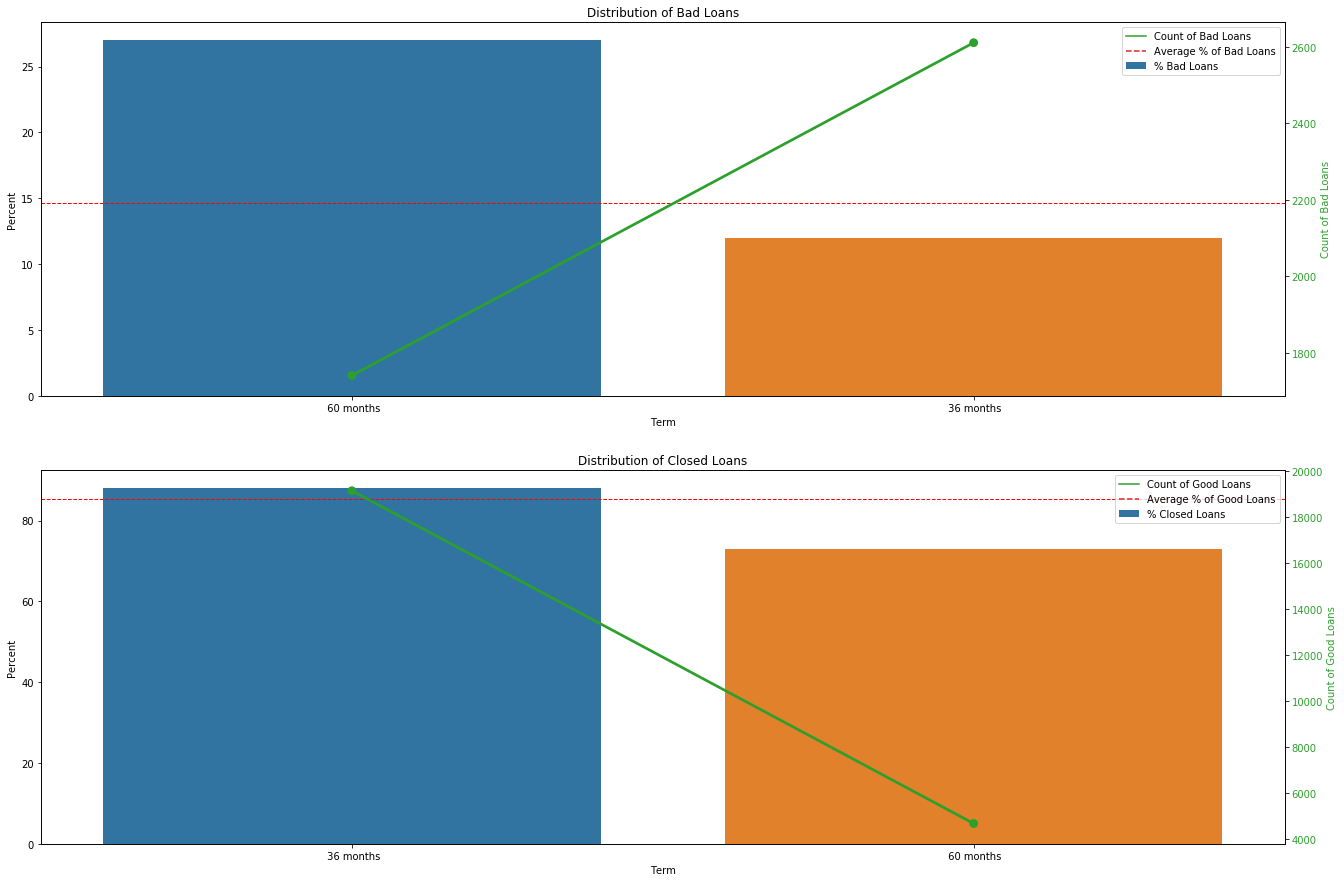

In [ ]:
# is there any relation w.r.t term and default rate
group_and_default_rate('term', pxlabel='Term', rot_x_label=False)

#### <font color='Maroon'>Insights - Longer duration loans have higher default rate</font>

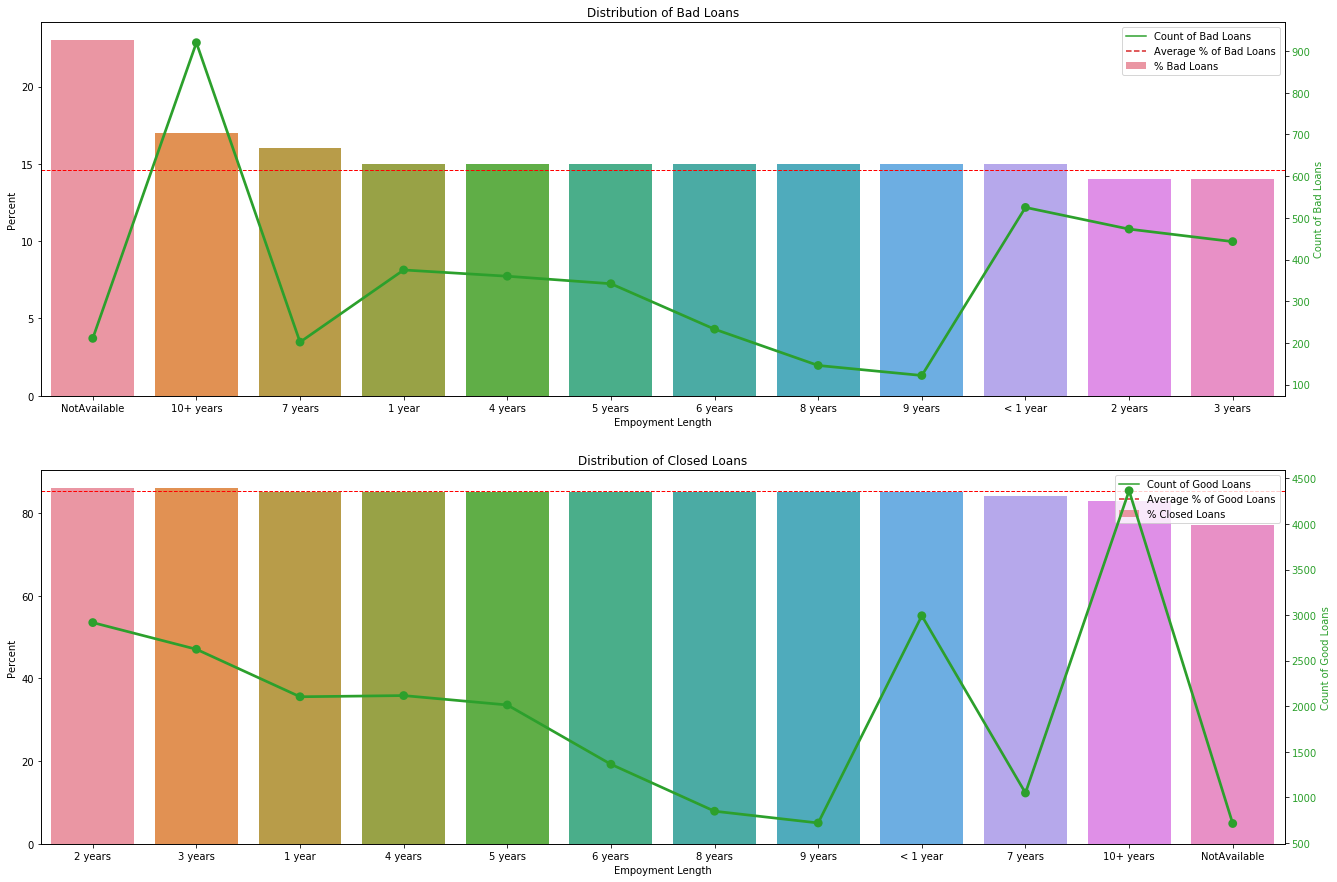

In [ ]:
# is there any relation w.r.t emp_length and default rate
group_and_default_rate('emp_length', pxlabel='Empoyment Length', rot_x_label=False)

#### <font color='Maroon'>Insights - %age wise “no available information” on current employee length seems to have the highest default rate. However the 10+ years seems to have a higher than average default rate with good volumes. </font>

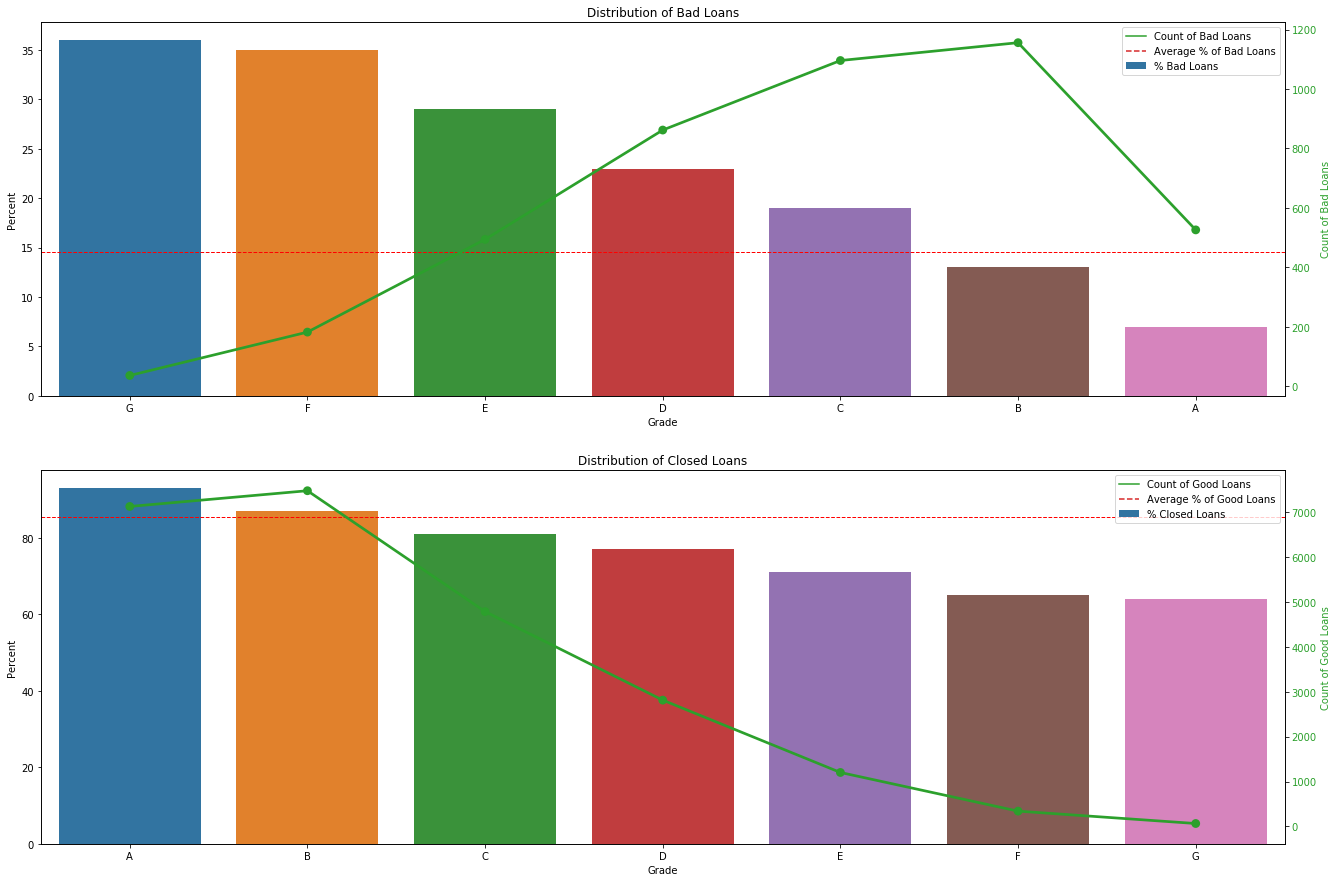

In [ ]:
# is there any relation w.r.t grade and default rate
group_and_default_rate('grade', pxlabel='Grade', rot_x_label=False)

#### <font color='Maroon'>Insights - Only A and B graded loans have the average default rates lower than average and the volumes of B is the highest in disbursement</font>

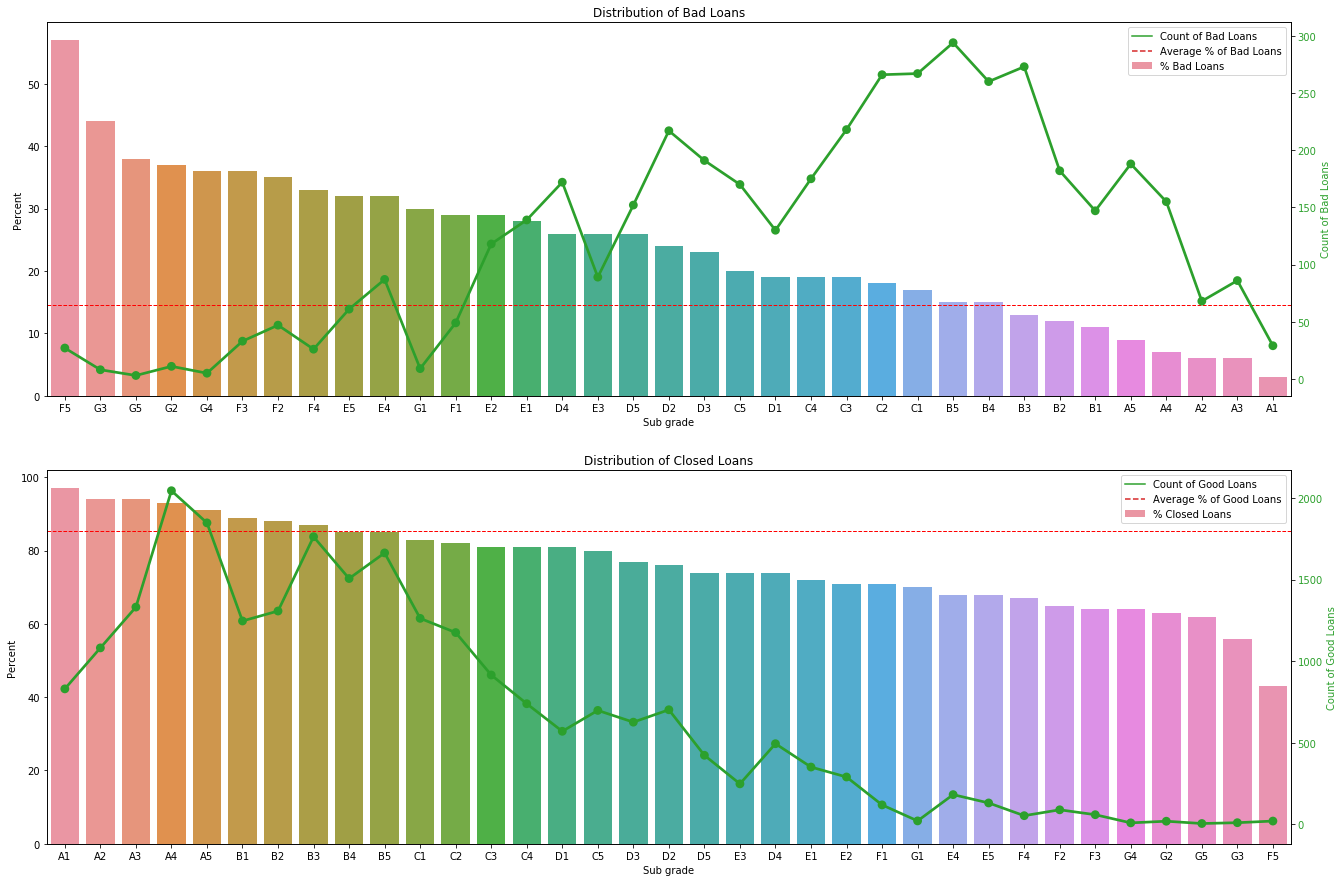

In [ ]:
# is there any relation w.r.t sub_grade and default rate
group_and_default_rate('sub_grade', pxlabel='Sub grade', rot_x_label=False)

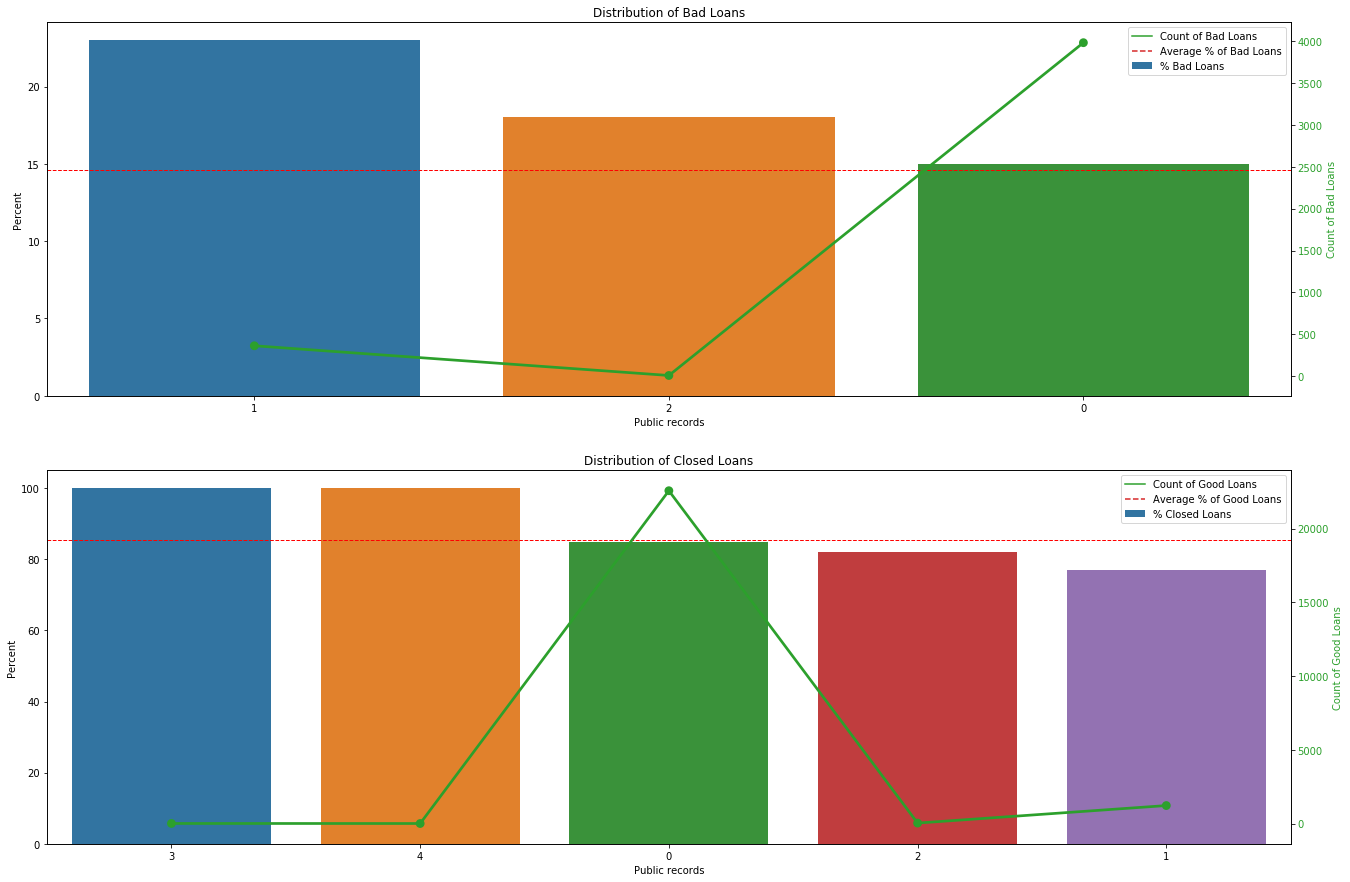

In [ ]:
# is there any relation w.r.t pub_rec and default rate
group_and_default_rate('pub_rec', pxlabel='Public records', rot_x_label=False)

#### <font color='Maroon'>Insights - People with 0 Public records have the lowert default rates </font>

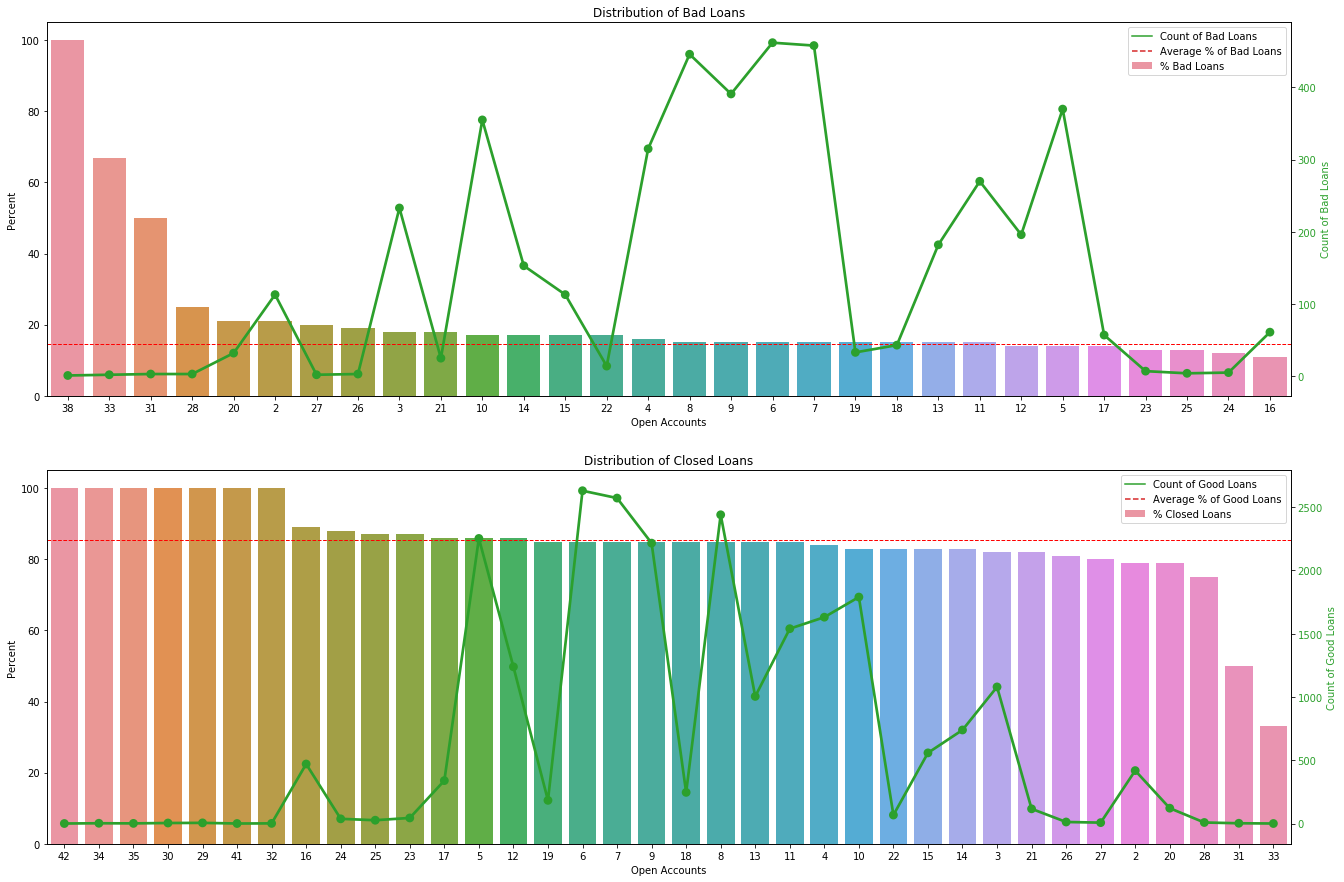

In [ ]:
# is there any relation w.r.t open_acc and default rate
group_and_default_rate('open_acc', pxlabel='Open Accounts', rot_x_label=False)

In [ ]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Bivariate Analysis

In [ ]:
bivariate_loan_data = loan_data[['addr_state', 'verification_status', 'purpose', 'home_ownership',
                                           'emp_title', 'term', 'emp_length', 'grade', 'sub_grade',
                                           'loan_status', 'pub_rec', 'issue_d', 'inq_last_6mths',
                                           'pub_rec_bankruptcies', 'delinq_2yrs', 'open_acc',
                                           'int_rate', 'loan_amnt', 'installment',
                                           'dti', 'funded_amnt', 'funded_amnt_inv', 'annual_inc']]
bivariate_loan_data.head()

,addr_state,verification_status,purpose,home_ownership,emp_title,term,emp_length,grade,sub_grade,loan_status,pub_rec,issue_d,inq_last_6mths,pub_rec_bankruptcies,delinq_2yrs,open_acc,int_rate,loan_amnt,installment,dti,funded_amnt,funded_amnt_inv,annual_inc
0,AZ,Verified,credit_card,RENT,NaN,36 months,10+ years,B,B2,Fully Paid,0,Dec-11,1,0.0,0,3,10.65,5000,162.87,27.65,5000,4975.0,24000.0
1,GA,Source Verified,car,RENT,Ryder,60 months,< 1 year,C,C4,Charged Off,0,Dec-11,5,0.0,0,3,15.27,2500,59.83,1.00,2500,2500.0,30000.0
2,IL,Not Verified,small_business,RENT,NaN,36 months,10+ years,C,C5,Fully Paid,0,Dec-11,2,0.0,0,2,15.96,2400,84.33,8.72,2400,2400.0,12252.0
3,CA,Source Verified,other,RENT,AIR RESOURCES BOARD,36 months,10+ years,C,C1,Fully Paid,0,Dec-11,1,0.0,0,10,13.49,10000,339.31,20.00,10000,10000.0,49200.0
5,AZ,Source Verified,wedding,RENT,Veolia Transportaton,36 months,3 years,A,A4,Fully Paid,0,Dec-11,3,0.0,0,9,7.90,5000,156.46,11.20,5000,5000.0,36000.0


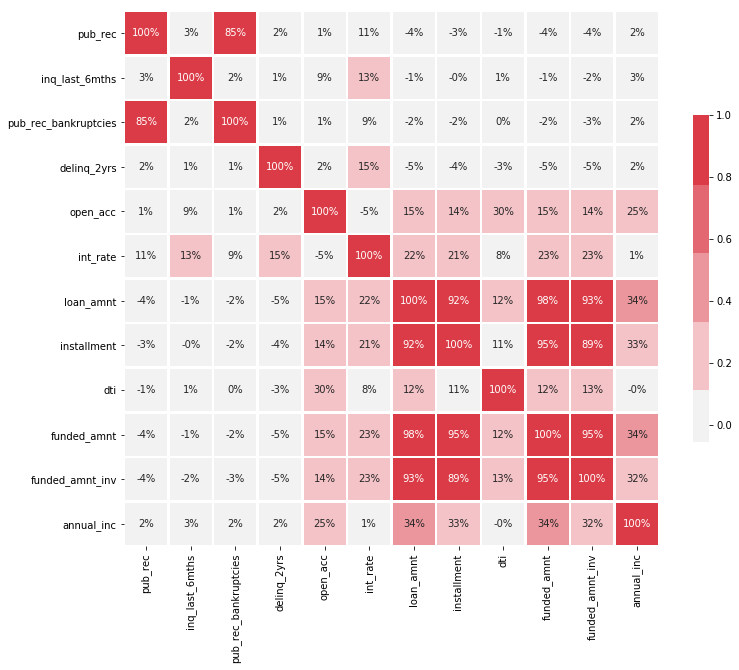

In [ ]:
plt.figure(figsize=(12, 12))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(bivariate_loan_data.corr(), cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True, fmt='.0%')
plt.show()



#### <font color='Maroon'>Insights - From the Heatmap  we see strong correlation seen b/w 
-  Number of derogatory public records (pub_rec) and Number of public record bankruptcies (pub_rec_bankruptcies)
-  Loan amount applied (loan_amnt) and monthly installment by the borrower (installment)
-  Loan amount applied (loan_amnt) and the committed Funding amount (funded_amnt)
-  Loan amount applied (loan_amnt) and committed funding amount by the investors (funded_amnt_inv)
-  Committed Funding amount (funded_amnt) and committed funding amount by the investors (funded_amnt_inv)
-  Monthly installment by the borrower (installment) and committed funding amount by the investors (funded_amnt_inv)</font>

#### <font color='Blue'>ACTION</font> 

From these list we have the following that have high correlation so we can reduce some of these columns
- Loan amount applied (loan_amnt) and monthly installment by the borrower (installment)
- Loan amount applied (loan_amnt) and the committed Funding amount (funded_amnt)
- Loan amount applied (loan_amnt) and committed funding amount by the investors (funded_amnt_inv)
- Monthly installment by the borrower (installment) and committed Funding amount (funded_amnt)
- Monthly installment by the borrower (installment) and committed funding amount by the investors (funded_amnt_inv)
- Committed Funding amount (funded_amnt) and committed funding amount by the investors (funded_amnt_inv)
- Number of derogatory public records (pub_rec) and Number of public record bankruptcies (pub_rec_bankruptcies)

Based on this would recommend   
- Drop funded_amnt_inv,installment, funded_amnt in favor of loan_amnt
- Drop Number of public record bankruptcies (pub_rec_bankruptcies) in favor of pub_rec
- Drop emp_title as there are just too many unique values
- Drop sub_grade in favor of grade

#### Derived metrics

In [ ]:
bivariate_loan_data = bivariate_loan_data.drop(columns=['emp_title', 'sub_grade', 'funded_amnt_inv', 'funded_amnt', 'installment', 'pub_rec_bankruptcies'])
bivariate_loan_data.head()

,addr_state,verification_status,purpose,home_ownership,term,emp_length,grade,loan_status,pub_rec,issue_d,inq_last_6mths,delinq_2yrs,open_acc,int_rate,loan_amnt,dti,annual_inc
0,AZ,Verified,credit_card,RENT,36 months,10+ years,B,Fully Paid,0,Dec-11,1,0,3,10.65,5000,27.65,24000.0
1,GA,Source Verified,car,RENT,60 months,< 1 year,C,Charged Off,0,Dec-11,5,0,3,15.27,2500,1.00,30000.0
2,IL,Not Verified,small_business,RENT,36 months,10+ years,C,Fully Paid,0,Dec-11,2,0,2,15.96,2400,8.72,12252.0
3,CA,Source Verified,other,RENT,36 months,10+ years,C,Fully Paid,0,Dec-11,1,0,10,13.49,10000,20.00,49200.0
5,AZ,Source Verified,wedding,RENT,36 months,3 years,A,Fully Paid,0,Dec-11,3,0,9,7.90,5000,11.20,36000.0


Derive months out of issue_d, whereas year of issue is not relevant for the analysis

In [ ]:
bivariate_loan_data['month'] = pd.to_datetime(bivariate_loan_data['issue_d'], format='%b-%y').dt.strftime('%b')
bivariate_loan_data = bivariate_loan_data.drop(columns=['issue_d'])
bivariate_loan_data.head()

,addr_state,verification_status,purpose,home_ownership,term,emp_length,grade,loan_status,pub_rec,inq_last_6mths,delinq_2yrs,open_acc,int_rate,loan_amnt,dti,annual_inc,month
0,AZ,Verified,credit_card,RENT,36 months,10+ years,B,Fully Paid,0,1,0,3,10.65,5000,27.65,24000.0,Dec
1,GA,Source Verified,car,RENT,60 months,< 1 year,C,Charged Off,0,5,0,3,15.27,2500,1.00,30000.0,Dec
2,IL,Not Verified,small_business,RENT,36 months,10+ years,C,Fully Paid,0,2,0,2,15.96,2400,8.72,12252.0,Dec
3,CA,Source Verified,other,RENT,36 months,10+ years,C,Fully Paid,0,1,0,10,13.49,10000,20.00,49200.0,Dec
5,AZ,Source Verified,wedding,RENT,36 months,3 years,A,Fully Paid,0,3,0,9,7.90,5000,11.20,36000.0,Dec


Convert categorical variables to number to figure out if there is any relation using pairplot

In [ ]:
numerical_loan_data = bivariate_loan_data.copy()
numerical_loan_data = numerical_loan_data[numerical_loan_data['loan_status'] == 'Charged Off']

numerical_loan_data['addr_state'] = numerical_loan_data['addr_state'].astype('category').cat.codes
numerical_loan_data['verification_status'] = numerical_loan_data['verification_status'].astype('category').cat.codes
numerical_loan_data['purpose'] = numerical_loan_data['purpose'].astype('category').cat.codes
numerical_loan_data['grade'] = numerical_loan_data['grade'].astype('category').cat.codes
numerical_loan_data['month'] = numerical_loan_data['month'].astype('category').cat.codes
numerical_loan_data['home_ownership'] = numerical_loan_data['home_ownership'].astype('category').cat.codes
numerical_loan_data['term'] = numerical_loan_data['term'].astype('category').cat.codes
numerical_loan_data['emp_length'] = numerical_loan_data['emp_length'].astype('category').cat.codes

numerical_loan_data.head()

,addr_state,verification_status,purpose,home_ownership,term,emp_length,grade,loan_status,pub_rec,inq_last_6mths,delinq_2yrs,open_acc,int_rate,loan_amnt,dti,annual_inc,month
1,10,1,0,3,1,10,2,Charged Off,0,5,0,3,15.27,2500,1.00,30000.0,2
8,4,1,11,2,1,4,5,Charged Off,0,2,0,11,21.28,5600,5.55,40000.0,2
9,39,2,9,3,1,10,1,Charged Off,0,0,0,2,12.69,5375,18.08,15000.0,2
12,41,1,2,3,0,10,2,Charged Off,0,1,0,4,13.49,9000,10.08,30000.0,2
24,4,0,6,3,0,0,1,Charged Off,0,1,0,7,11.71,6000,2.40,76000.0,2


In [ ]:
sns.pairplot(numerical_loan_data)
plt.show()

In [64]:
from IPython.core.display import display, HTML
HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_above()"><input type="submit" id="toggleButton" value="Run all above Cells"></form>''')

### Some out of ordinary pattern seen between pairs
* addr_state and home_ownership
* addr_state and pub_rec
* home_ownership and purpose
* pub_rec and purpose
* purpose and grade
* purpose and loan_amnt
* home_ownership and emp_length
* verification_status and delinq_2yrs
* term and delinq_2yrs
* emp_length and loan_amnt
* grade and delinq_2yrs
* grade and int_rate
* grade and loan_amnt
* emp_length and purpose

#### <font color='Maroon'>Insights - From the Pair plots we see strong correlation seen b/w 
-  Loan amount applied (loan_amnt) and monthly installment by the borrower (installment)
-  Loan amount applied (loan_amnt) and the committed Funding amount (funded_amnt)
-  Loan amount applied (loan_amnt) and committed funding amount by the investors (funded_amnt_inv)
-  Monthly installment by the borrower (installment) and committed Funding amount (funded_amnt)
-  Monthly installment by the borrower (installment) and committed funding amount by the investors (funded_amnt_inv)
-  Committed Funding amount (funded_amnt) and committed funding amount by the investors (funded_amnt_inv)</font>

# Reviewed till here - Vishal 

# TODO Decide what to plot here.....was thinking of low-low, low-medium and low high nothing more....
## Get one liner out and then move full to PPT

## one TODO, is should we pull the derived columns upfront. I am not sure like is year a good column to do analysis given its all history. Month may be, though I would doubt it as noise. 
## Do we need binning or bucketing strategy anywhere to reduce the number of variability which are more for the medium, high and very high

## Can we have a quick call....for a short while so we can move towards closure
## Remove high unique values - emp_title and title if they are present in the bivariate set upfront

## Bugs in heatmap - Height, label va = center
## Shakeeb to list what images make sense to hightlight in ppt

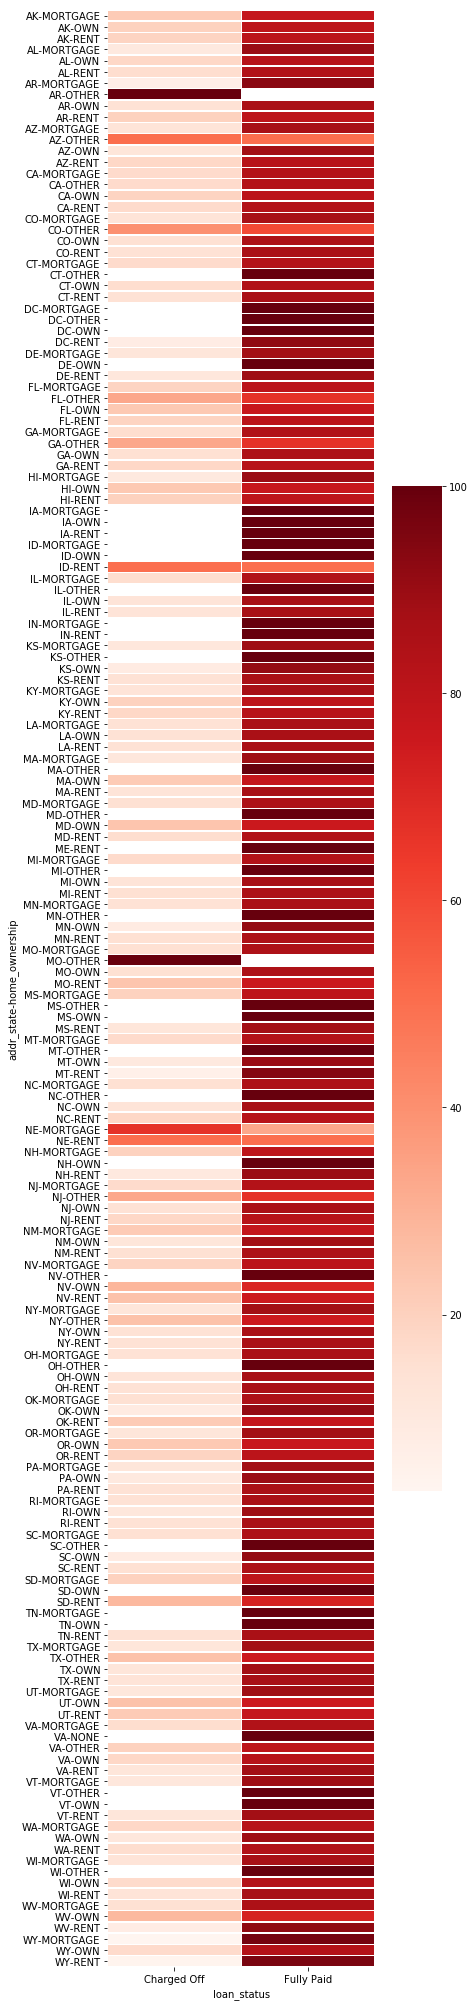

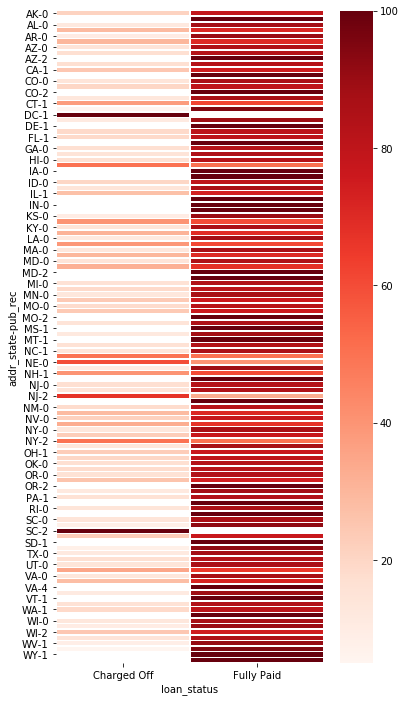

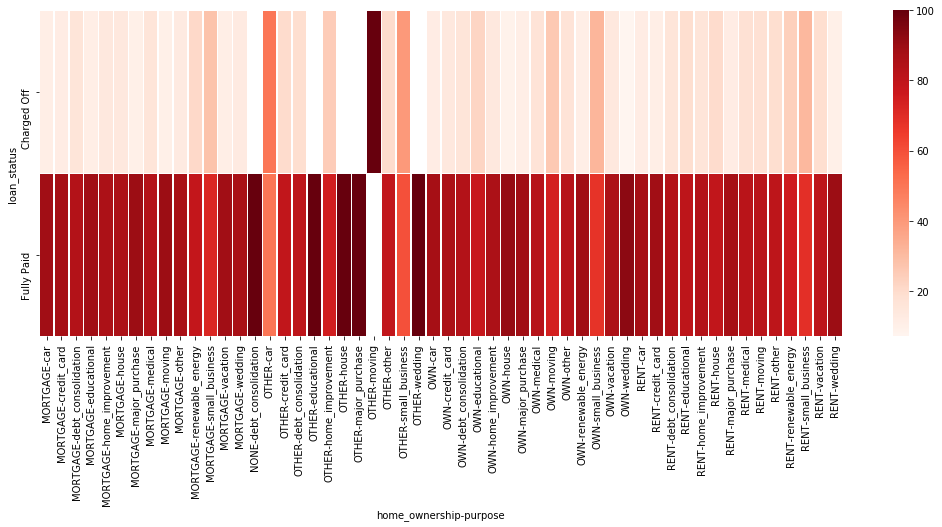

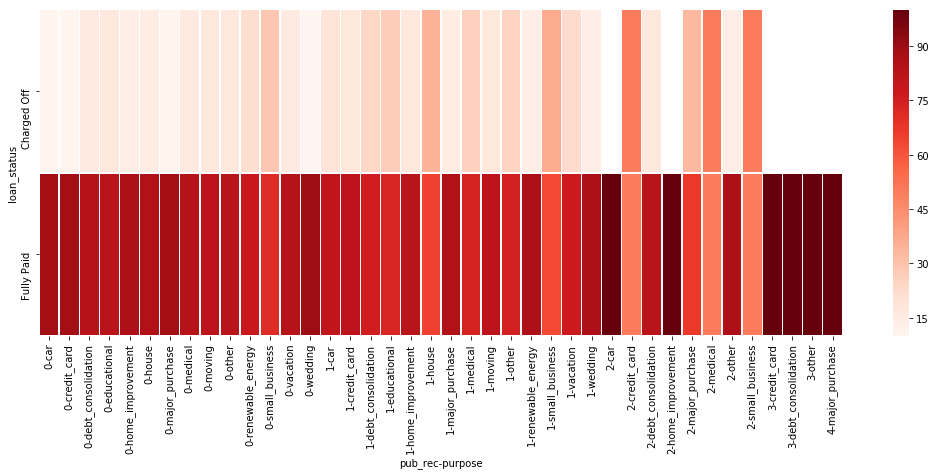

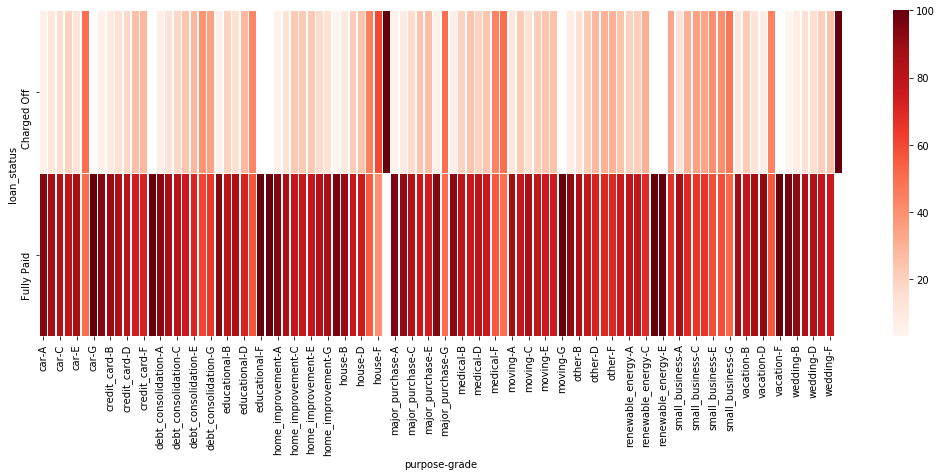

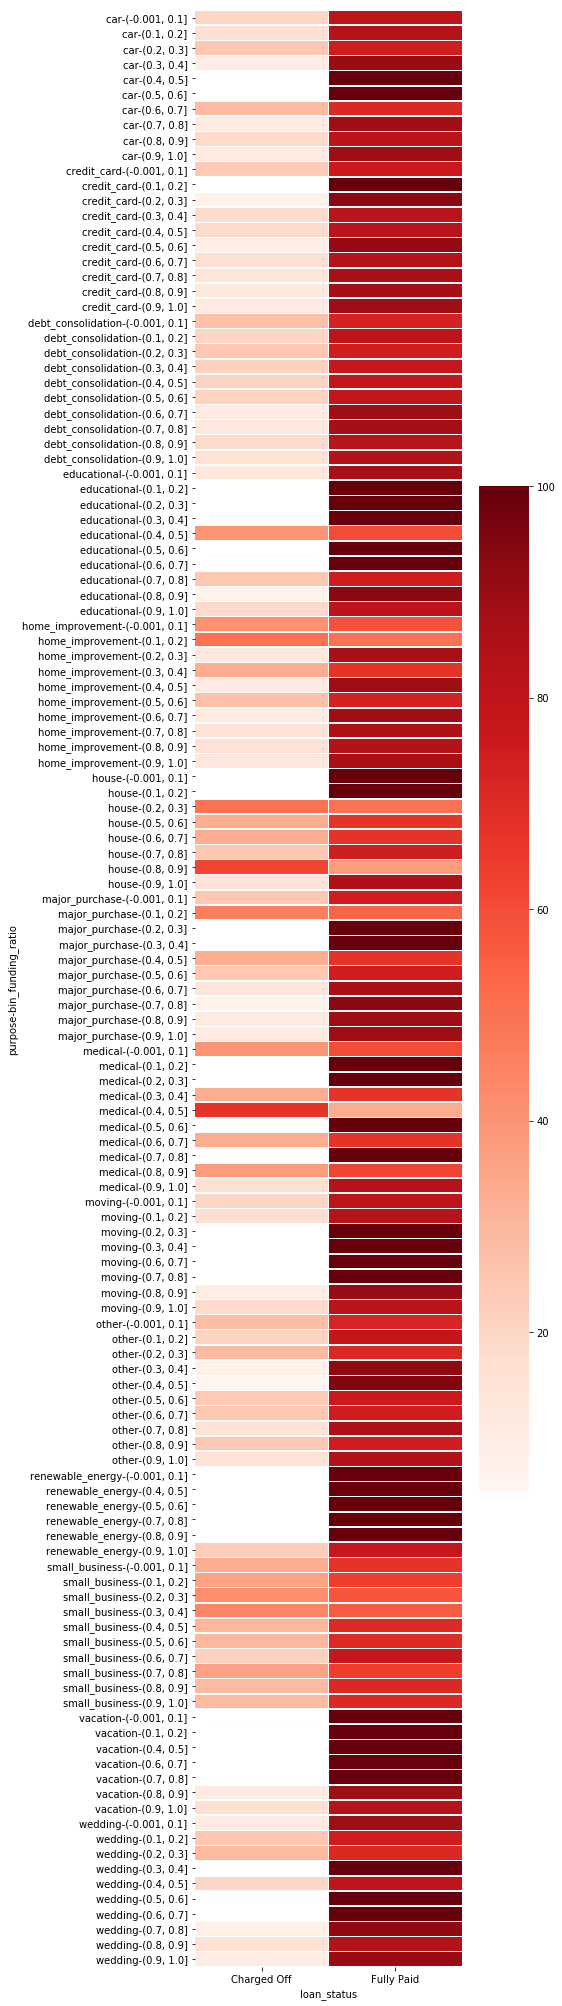

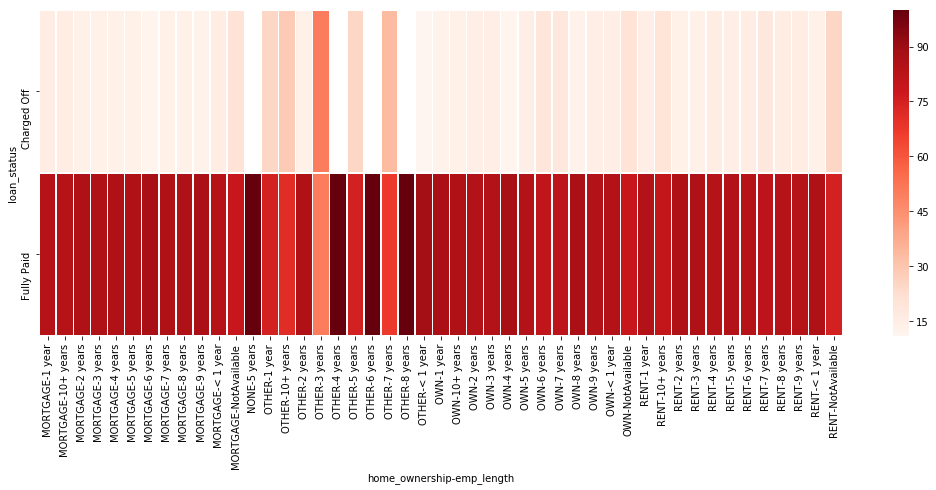

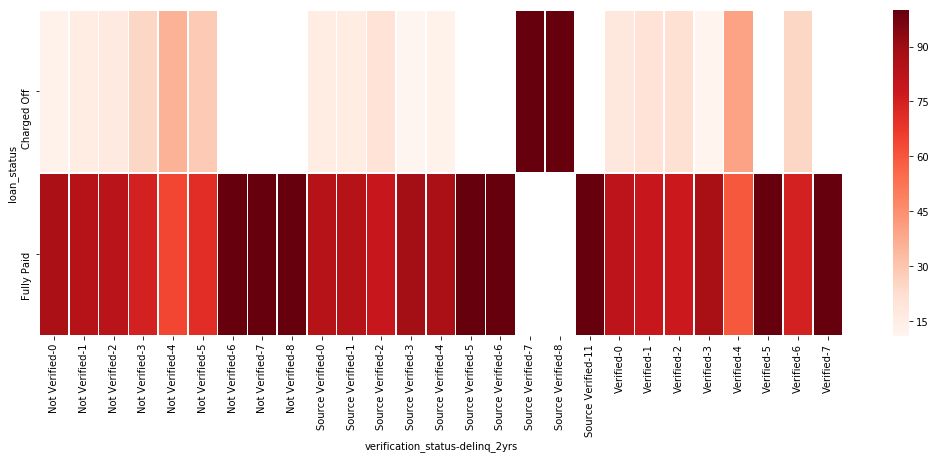

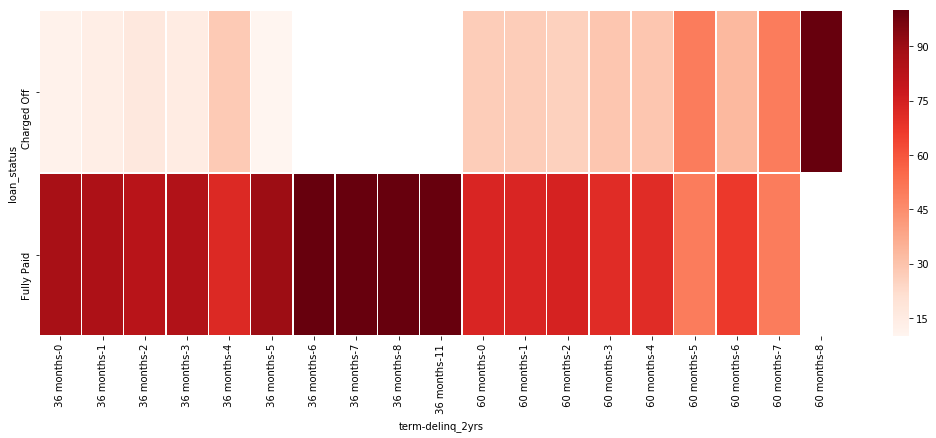

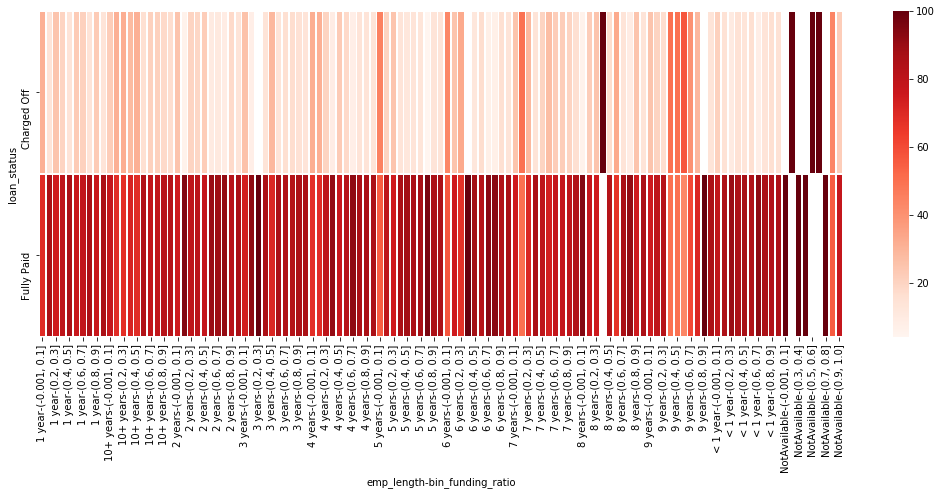

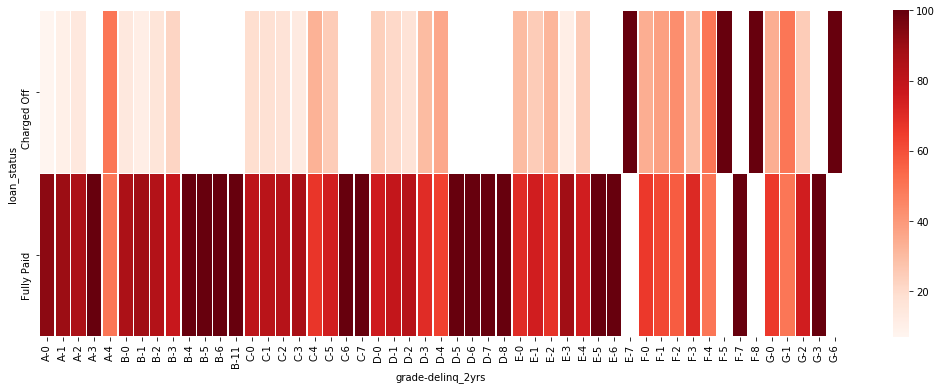

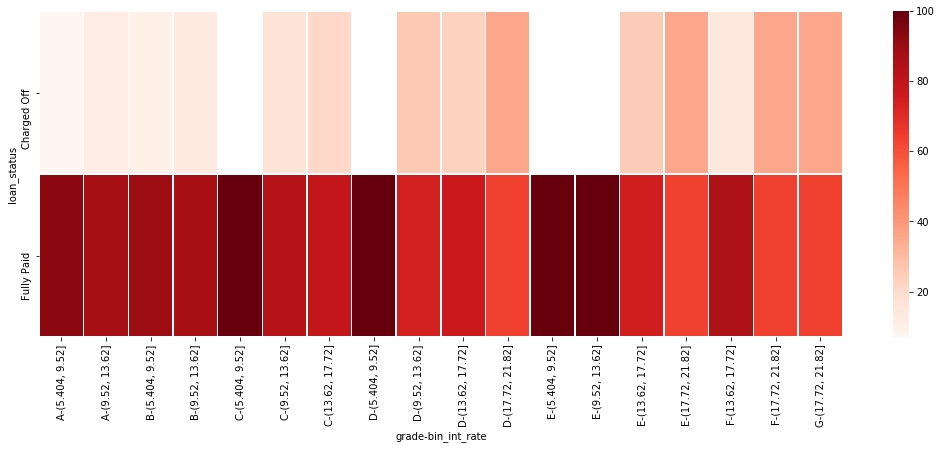

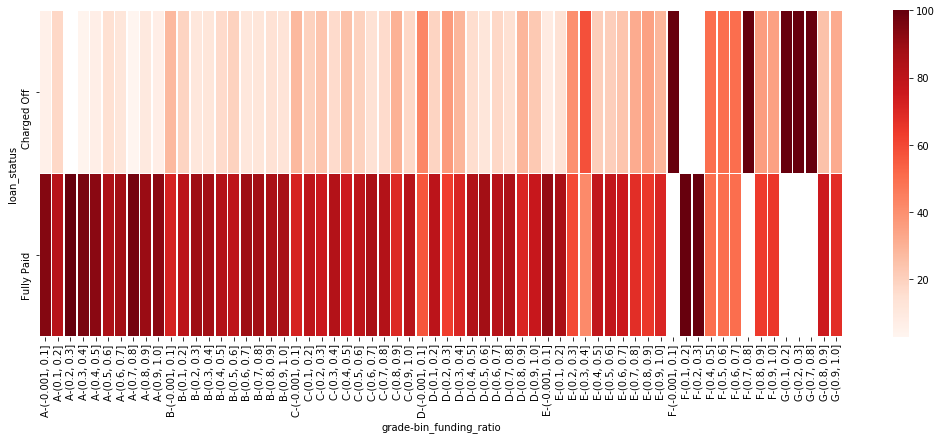

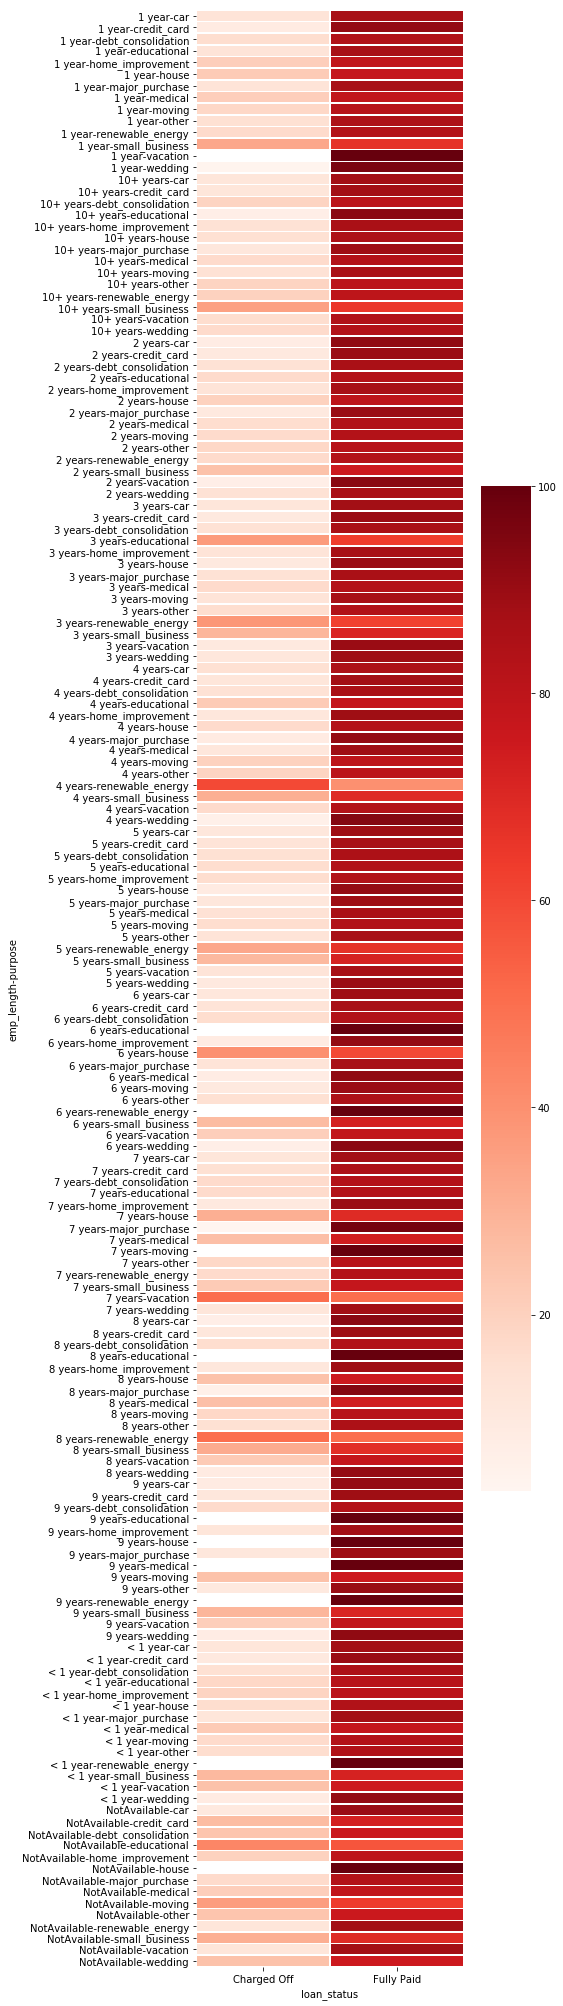

In [498]:
def heat_map_bivariate(df, cols, size=(18, 6), rotate=False):
    # grade and term vs loan_status
    p_table = df.groupby(cols+['loan_status']).count()
    p_table['count'] = p_table.iloc[:, 0]
    totals_table = p_table.groupby(cols).sum()

    p_table = p_table.join(totals_table, how='inner', rsuffix="_l").reset_index()
    p_table = p_table.rename(columns={'count_l':'total'})
    p_table['rate'] = round(100*(p_table['count']/p_table['total']))

    df = p_table.pivot_table(values='rate',index='loan_status',columns=cols)
    if rotate:
        df = df.transpose()

    plt.figure(figsize=size)
    sns.heatmap(df, cmap="Reds", linewidths=0.5)
    plt.show()
    
pairs = [
{'cols':["addr_state", "home_ownership"], 'rotate':True, 'size':(6, 36)}, 
{'cols':["addr_state", "pub_rec"], 'rotate':True, 'size':(6, 12)}, 
{'cols':["home_ownership", "purpose"]}, 
{'cols':["pub_rec", "purpose"]}, 
{'cols':["purpose", "grade"]}, 
{'cols':["purpose", "bin_loan_amnt"], 'rotate': True, 'size':(6, 36)}, 
{'cols':["home_ownership", "emp_length"]}, 
{'cols':["verification_status", "delinq_2yrs"]}, 
{'cols':["term", "delinq_2yrs"]}, 
{'cols':["emp_length", "bin_loan_amnt"]}, 
{'cols':["grade", "delinq_2yrs"]}, 
{'cols':["grade", "bin_int_rate"]}, 
{'cols':["grade", "bin_loan_amnt"]}, 
{'cols':["emp_length", "purpose"], 'rotate': True, 'size':(6, 36)} 
 ]

# binning
bivariate_loan_data['bin_int_rate'] = pd.cut(bivariate_loan_data.int_rate, 4)
bivariate_loan_data['bin_loan_amnt'] = pd.cut(bivariate_loan_data.loan_amnt, 10)

for obj in pairs:
    heat_map_bivariate(bivariate_loan_data, **obj)